<h1>📚 CSMODEL - PROJECT [PHASE 2] 📚</h1>

by <b>Group 1:</b>
- DAYON, Elijah
- ERMITANO, Kate Justine
- LLAMADO, Jon

<b>Instructor:</b> Sir Arren Matthew C. Antioquia

<h2>🚩 Review of PHASE 1 🚩</h2>

This is a continuation of the project that uses the **`Complete Pokemon Dataset (Updated 16.04.21)`** dataset submitted back in the 21st of November 2022.

The link to the dataset is as follows: https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420?resource=download by Mario Tormo Romero.

The processes done in the first notebook are as follows: <b>📝 Dataset Description 📝, 🧽 Dataset Cleaning 🧽, 📊 Exploratory Data Analysis 📊, and 🤔 Research Question 🤔</b>. To review the first notebook, the Google Drive link can be accessed: https://drive.google.com/drive/folders/1fZw-4M6GmT9ROLmb5XPm6uyI65HDtOnq?usp=share_link
<figure>
    <img src="https://i.pinimg.com/564x/24/d1/01/24d101849738df521f17db9701ec63d2.jpg" style="width: 80%">
    <figcaption style="text-align: center">Pokemon Starters from Generation 1 to 8</figcaption>
</figure>

<h2>🤔 Research Question 🤔</h2>

<h3 style="color: #ff8d8c">What is the relation between pokemon generation and type 1 element to health points, defense, special attack, special defense, and speed?</h3>

This research question aims to find which generation and type 1 element element is best to use based on the pokemons' statistics on total points, health points, defense, special attack, special defense, and speed. 

It may be difficult for persons to choose which pokemon is best to use because there are over 1000 pokemons as observed in the dataset. To rely only on one single pokemon with the strongest statistic is not the best solution because there are many different factors to choose which pokemon is best on certain situations. With that, a solution will be made by checking which generation and type 1 element is best to use based on the statistics provided in the pokemon dataframe, mainly health points, defense, special attack, special defense, and speed. 

<h2>📤 Reading the Dataset 📤</h2>

To retrieve the dataset that was cleaned from the previous phase of the project, we implement the following code to read the `.csv` file.

In [1]:
# import pandas and numpy
import pandas as pd
import numpy as np

In [2]:
# read and assign the .csv file to pokemon_df
poke_df = pd.read_csv("cleaned-pokemon-dataset.csv")

To ensure that the correct file has been read, use the `.info()` function to review the contents of the dataset.

In [3]:
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   generation        1028 non-null   int64  
 4   status            1028 non-null   object 
 5   species           1028 non-null   object 
 6   type_number       1028 non-null   int64  
 7   type_1            1028 non-null   object 
 8   type_2            542 non-null    object 
 9   height_m          1028 non-null   float64
 10  weight_kg         1028 non-null   float64
 11  abilities_number  1028 non-null   int64  
 12  ability_1         1028 non-null   object 
 13  ability_2         513 non-null    object 
 14  ability_hidden    810 non-null    object 
 15  total_points      1028 non-null   float64
 16  hp                1028 non-null   float64


Once done, we can continue with the process of modifying our data to suit the needs of our chosen data modelling technique.

<h2>📦 Data Modelling 📦</h2>

<h3>🔧 Data Preprocessing 🔨</h3>

Before we start modelling the data, it is be wise to perform data preprocessing to transform the data into the appropriate representations. Techniques include: <b>(1) Querying, (2) Imputation, (3) Binning, (4) Outlier Detection, (5) One Hot Encoding, (6) Log Transformation, (7) Aggregation, (8) Column Transformation, (9) Feature Scaling,</b> and <b>(10) Feature Engineering</b>.

<h3>Querying</h3>

Querying is done by selecting observations based on a certain condition (e.g. Select all the pokemon with attack stats greater than 100, among others). There can be multiple conditions set to filter more data.

However, since we are interested in modelling our data using all of the Pokemon in the dataset, this step can be skipped. We can now move on to imputation.

<h3>Imputation</h3>

The process of imputation involves replacing all <b>Nan</b> or <b>Null</b> values with the mean or mode of the series the missing value belongs to. To ensure that our dataset does not contain missing values, use `isnull()` combined with `.any()` to retrieve the list of columns and the answer to whether it contains null missings or not.

In [4]:
poke_df.isnull().any()

Unnamed: 0          False
pokedex_number      False
name                False
generation          False
status              False
species             False
type_number         False
type_1              False
type_2               True
height_m            False
weight_kg           False
abilities_number    False
ability_1           False
ability_2            True
ability_hidden       True
total_points        False
hp                  False
attack              False
defense             False
sp_attack           False
sp_defense          False
speed               False
catch_rate          False
base_friendship     False
base_experience     False
growth_rate         False
egg_type_number     False
egg_type_1          False
egg_type_2           True
percentage_male     False
egg_cycles          False
against_normal      False
against_fire        False
against_water       False
against_electric    False
against_grass       False
against_ice         False
against_fight       False
against_pois

Like what was mentioned in the previous phase of the project, only <b>type_2, ability_2, ability_hidden</b>, and <b>egg_type_2</b> can contain missing values as some Pokemon are monotypes, have one ability, no hidden abiliy, and single egg type. 

Since the rest of the columns do not have null values, the process of imputation is done.

<h3>Binning</h3>

Binning is grouping specific data together into general categories. For example, all the water starters from generations 1-8 (Squirtle, Totodile, Mudkip, Piplup, Oshawott, Froakie, Popplio, and Sobble) can be grouped as water starters in general.

In [5]:
poke_df

Unnamed: 0  pokedex_number                            name  generation  \
0              0               1                       Bulbasaur           1   
1              1               2                         Ivysaur           1   
2              2               3                        Venusaur           1   
3              3               3                   Mega Venusaur           1   
4              4               4                      Charmander           1   
...          ...             ...                             ...         ...   
1023        1023             888     Zacian Hero of Many Battles           8   
1024        1024             889        Zamazenta Crowned Shield           8   
1025        1025             889  Zamazenta Hero of Many Battles           8   
1026        1026             890                       Eternatus           8   
1027        1027             890             Eternatus Eternamax           8   

         status           species  type_number    type_1  type_2  height_m  \
0        Normal      Seed Pokémon            2     Grass  Poison       0.7   
1        Normal      Seed Pokémon            2     Grass  Poison       1.0   
2        Normal      Seed Pokémon            2     Grass  Poison       2.0   
3        Normal      Seed Pokémon            2     Grass  Poison       2.4   
4        Normal    Lizard Pokémon            1      Fire     NaN       0.6   
...         ...               ...          ...       ...     ...       ...   
1023  Legendary   Warrior Pokémon            1     Fairy     NaN       2.8   
1024  Legendary   Warrior Pokémon            2  Fighting   Steel       2.9   
1025  Legendary   Warrior Pokémon            1  Fighting     NaN       2.9   
1026  Legendary  Gigantic Pokémon            2    Poison  Dragon      20.0   
1027  Legendary  Gigantic Pokémon            2    Poison  Dragon     100.0   

      ...  against_ground  against_flying against_psychic against_bug  \
0     ...             1.0             2.0             2.0        1.00   
1     ...             1.0             2.0             2.0        1.00   
2     ...             1.0             2.0             2.0        1.00   
3     ...             1.0             2.0             2.0        1.00   
4     ...             2.0             1.0             1.0        0.50   
...   ...             ...             ...             ...         ...   
1023  ...             1.0             1.0             1.0        0.50   
1024  ...             2.0             1.0             1.0        0.25   
1025  ...             1.0             2.0             2.0        0.50   
1026  ...             2.0             1.0             2.0        0.50   
1027  ...             2.0             1.0             2.0        0.50   

     against_rock  against_ghost  against_dragon  against_dark  against_steel  \
0            1.00            1.0             1.0           1.0            1.0   
1            1.00            1.0             1.0           1.0            1.0   
2            1.00            1.0             1.0           1.0            1.0   
3            1.00            1.0             1.0           1.0            1.0   
4            2.00            1.0             1.0           1.0            0.5   
...           ...            ...             ...           ...            ...   
1023         1.00            1.0             0.0           0.5            2.0   
1024         0.25            1.0             0.5           0.5            0.5   
1025         0.50            1.0             1.0           0.5            1.0   
1026         1.00            1.0             2.0           1.0            1.0   
1027         1.00            1.0             2.0           1.0            1.0   

      against_fairy  
0               0.5  
1               0.5  
2               0.5  
3               0.5  
4               0.5  
...             ...  
1023            1.0  
1024            1.0  
1025            2.0  
1026            1.0  
1027            

Upon inspecting the dataset, since we are interested in every single Pokemon and their individual statistics (HP, attack, defense, sp. attack, sp. defense, and speed), there is no need to perform binning. We want to determine who are those Pokemon belonging in the cluster with the strongest overall statistic. Binning could potentially lose all crucial information in finding out the best Pokemon.
<figure>
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.oYFYbDjFYnalbDmsV7EntAHaFr%26pid%3DApi&f=1&ipt=60210ccb25e0429e5eb69f6ac25c36d20b321f680f91f11496d6225d6e9fef7d&ipo=images" style="width: 40%">
    <figcaption style="text-align: center">Who's that Pokemon?</figcaption>
</figure>

<h3>Outlier Detection</h3>

Values such as 9999 or negative values do not make sense in the Pokemon world. We can inspect numerical values for outliers. We can check the height_m and weight_kg columns by its primary type for unusual numbers using a boxplot. We can use the library `matplotlib` to plot a box plot.

In [6]:
%matplotlib inline
# import the library
import matplotlib as plt
# set up a theme for all visuals
plt.style.use('fivethirtyeight')

<AxesSubplot:title={'center':'height_m'}, xlabel='type_1'>

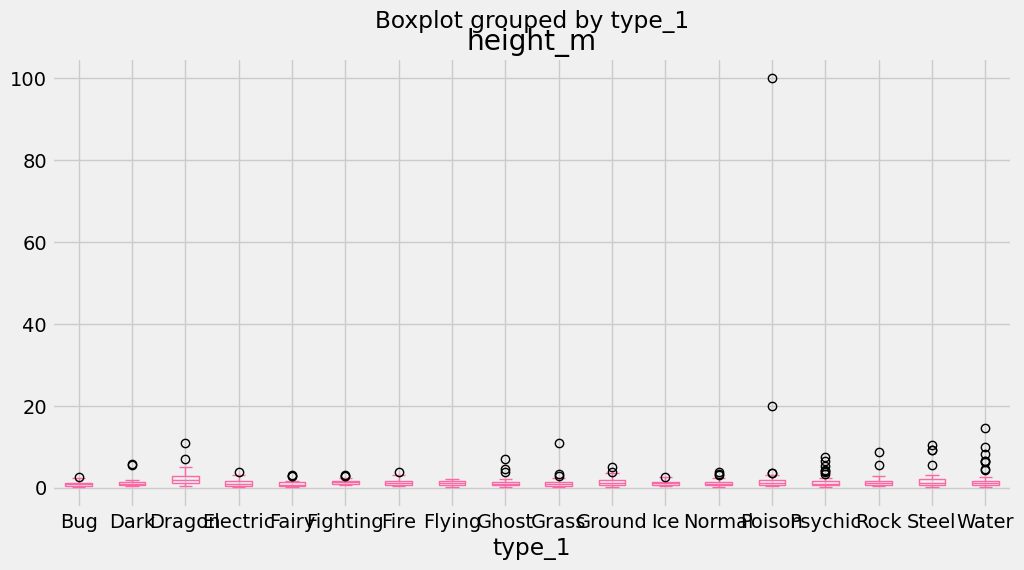

In [7]:
poke_df.boxplot("height_m", by="type_1", figsize=(12,6), color='#fc67a5')

<AxesSubplot:title={'center':'weight_kg'}, xlabel='type_1'>

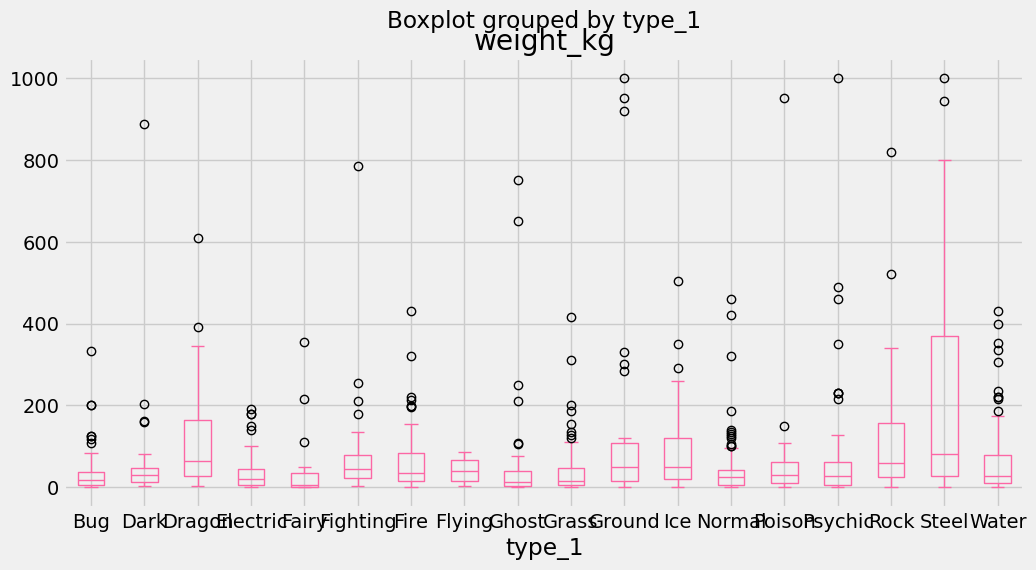

In [8]:
poke_df.boxplot("weight_kg", by="type_1", figsize=(12,6), color='#fc67a5')

Based on the boxplots above, we notice several outliers. However, considering that the Pokemon dataset is entirely fictional, we can give an exemption. Thus, there is no need to remove outliers.

In [9]:
copy_poke_df = poke_df.copy()

<h3>One Hot Encoding</h3>

This method converts categorical data into binary values (0 or 1) to represent a boolean value. This is useful for recommender systems. Upon inspection, there is no column that is categorical in nature where the values can be converted into boolean values. More, almost all the columns have more than two values.

In [10]:
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   generation        1028 non-null   int64  
 4   status            1028 non-null   object 
 5   species           1028 non-null   object 
 6   type_number       1028 non-null   int64  
 7   type_1            1028 non-null   object 
 8   type_2            542 non-null    object 
 9   height_m          1028 non-null   float64
 10  weight_kg         1028 non-null   float64
 11  abilities_number  1028 non-null   int64  
 12  ability_1         1028 non-null   object 
 13  ability_2         513 non-null    object 
 14  ability_hidden    810 non-null    object 
 15  total_points      1028 non-null   float64
 16  hp                1028 non-null   float64


In [11]:
poke_df["type_number"]

0       2
1       2
2       2
3       2
4       1
       ..
1023    1
1024    2
1025    1
1026    2
1027    2
Name: type_number, Length: 1028, dtype: int64

In [12]:
poke_df["type_number"].unique()

array([2, 1], dtype=int64)

We can take a look at the `type_number` column as it contains values that are either 1 or 2. However, one hot encoding cannot be applied to numerical values. Thus, there is no way we can employ one hot encoding to further prepare our data. 

<h3><strike>Log Transformation</strike> Box-Cox Transformation</h3>

The data collected will not always be as perfect as those printed in the text books. Normalizing the values minimizes the effect of very large values on our data while maintaining its order in the dataset. Before we decide to perform log transformation, let us first take a look at the graph plotting the values from the attack series to determine if log transformation is the right method to use.

First, import the following libraries to be used to determine if our data has a normal distribution:
- `matplotlib.pyplot` - a library specializing in visualizing data.
- `scipy.stats` - a library specializing in statistics.

Moreover, we import the `shapiro` package to use the <b>Shapiro-Wilk</b> test. The Shapiro-Wilk test is a method to test for normality. It outputs the <b>test statistic</b> and the <b>p-value</b>. We then set our alpha value <b>α = 0.05</b> for comparison.

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro 

Next, create a histogram and Q-Q plot for the attack series.

(array([  5.,   1.,  22.,  28.,  55.,  54., 101.,  76., 114.,  69., 114.,
         58., 100.,  35.,  45.,  38.,  45.,  18.,  15.,  12.,   9.,   5.,
          3.,   4.,   2.]),
 array([  5. ,  12.4,  19.8,  27.2,  34.6,  42. ,  49.4,  56.8,  64.2,
         71.6,  79. ,  86.4,  93.8, 101.2, 108.6, 116. , 123.4, 130.8,
        138.2, 145.6, 153. , 160.4, 167.8, 175.2, 182.6, 190. ]),
 <BarContainer object of 25 artists>)

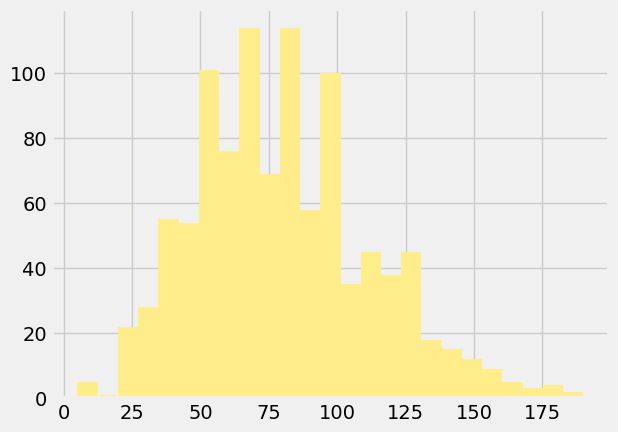

In [14]:
plt.hist(poke_df["attack"],bins=25, color="#ffed8b")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([  5.,   5.,  10., ..., 181., 185., 190.])),
 (32.15896629601837, 80.11964980544747, 0.9911970604715353))

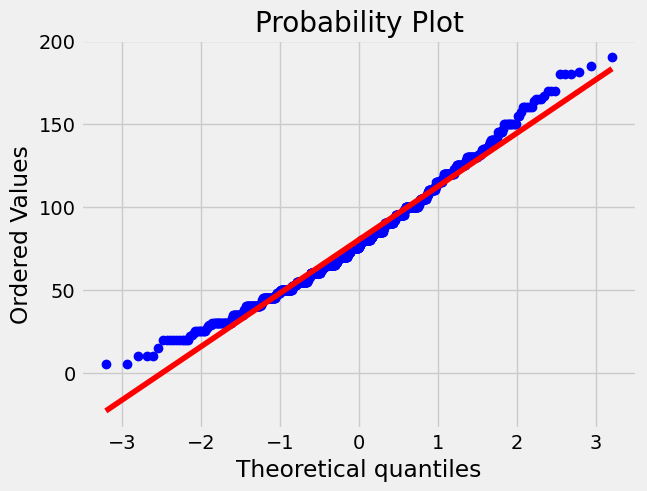

In [15]:
stats.probplot(poke_df["attack"], dist="norm", plot=plt)

In [16]:
stat, pval = shapiro(poke_df["attack"])
print("{:2f}".format(pval))

0.000000


Since the p-value is less than α = 0.05, we then reject the null hypothesis. Thus, the data does not have a normal distribution. To normalize the data, we use log transformation using the `.log` function to calculate the logarithm of the series.

In [17]:
log_attack = np.log(poke_df["attack"])

To ensure that if our data has a normal distribution, we use the Shapiro-Wilk test to calculate for the p-value. We will also create the null hypothesis and alternative hypothesis.

- <b>H<sub>O</sub></b> - the data has a normal distribution.
- <b>H<sub>A</sub></b> - the data does not have a normal distribution.

In [18]:
stat, pval = shapiro(log_attack)
print("{:2f}".format(pval))

0.000000


((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([1.60943791, 1.60943791, 2.30258509, ..., 5.19849703, 5.22035583,
         5.24702407])),
 (0.4488346064126259, 4.290972092377677, 0.9755637783431323))

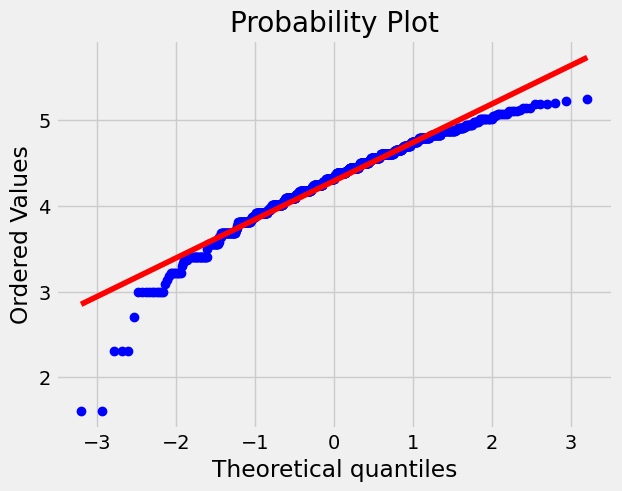

In [19]:
stats.probplot(log_attack, dist="norm", plot=plt)

However, when we use the log transformation method, our Q-Q plot reveals no sign of normal distribution, thus making the method failed to effectively normalize the data. To fix the issue, we use the `box-cox transformation` to transform our data. This outputs the normalized series and the lambda value.

In [20]:
norm_attack, norm_lambda = stats.boxcox(poke_df["attack"])

We repeat the process of creating the histogram to testing with the Shapiro-Wilk method to ensure if our data has been normalized.

(array([  2.,   3.,   0.,   1.,  12.,  11.,  27.,  22.,  70.,  57.,  69.,
        117.,  79., 106.,  71.,  96.,  88.,  47.,  59.,  38.,  18.,  14.,
         12.,   3.,   6.]),
 array([ 2.64339384,  3.87856758,  5.11374133,  6.34891507,  7.58408881,
         8.81926255, 10.0544363 , 11.28961004, 12.52478378, 13.75995752,
        14.99513127, 16.23030501, 17.46547875, 18.7006525 , 19.93582624,
        21.17099998, 22.40617372, 23.64134747, 24.87652121, 26.11169495,
        27.34686869, 28.58204244, 29.81721618, 31.05238992, 32.28756367,
        33.52273741]),
 <BarContainer object of 25 artists>)

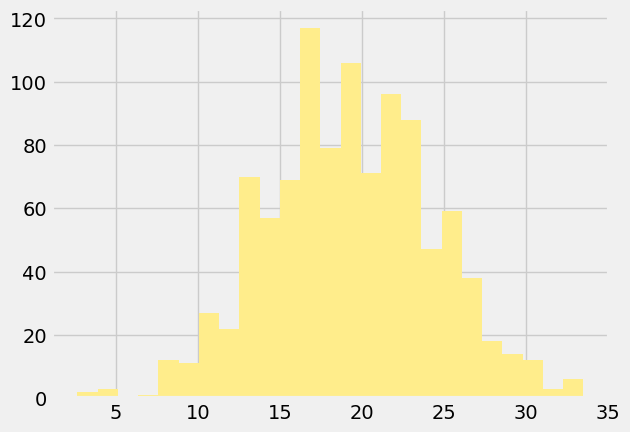

In [21]:
plt.hist(norm_attack,bins=25, color="#ffed8b")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([ 2.64339384,  2.64339384,  4.78296008, ..., 32.55577985,
         32.98801606, 33.52273741])),
 (5.052614023242784, 19.310594140422623, 0.9988668440603913))

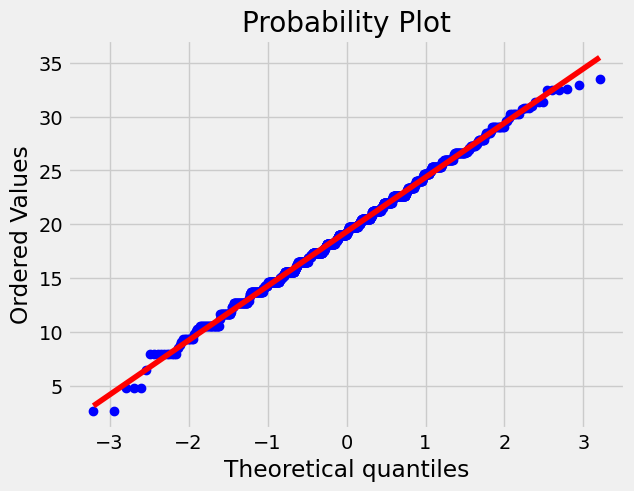

In [22]:
stats.probplot(norm_attack, dist="norm", plot=plt)

In [23]:
stat, pval = shapiro(norm_attack)
print("{:2f}".format(pval))

0.112172


Now that our p-value is greater than α = 0.05, we fail to reject the null hypothesis. Finally, we can conclude that the data has been normalized. We can repeat the process with the rest of the columns we are interested in.

<h4>Transform Total Points</h4>

(array([ 23.,  33.,  58., 136.,  76.,  49., 112., 102., 193.,  90.,  48.,
         58.,   6.,  33.,   4.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([ 175.,  213.,  251.,  289.,  327.,  365.,  403.,  441.,  479.,
         517.,  555.,  593.,  631.,  669.,  707.,  745.,  783.,  821.,
         859.,  897.,  935.,  973., 1011., 1049., 1087., 1125.]),
 <BarContainer object of 25 artists>)

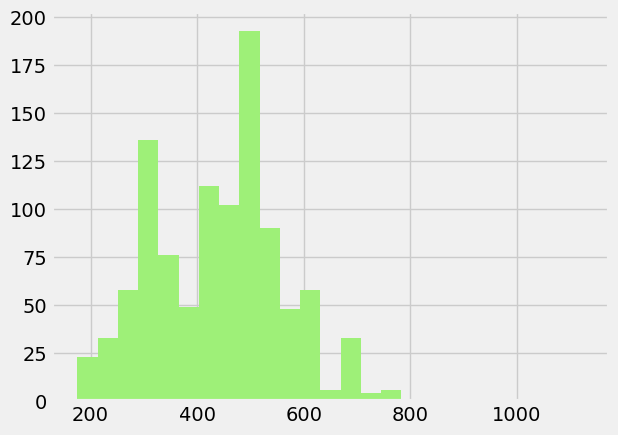

In [24]:
plt.hist(poke_df["total_points"],bins=25, color="#9ef078")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([ 175.,  180.,  180., ...,  780.,  780., 1125.])),
 (120.5029559906747, 437.5719844357977, 0.9882438638813381))

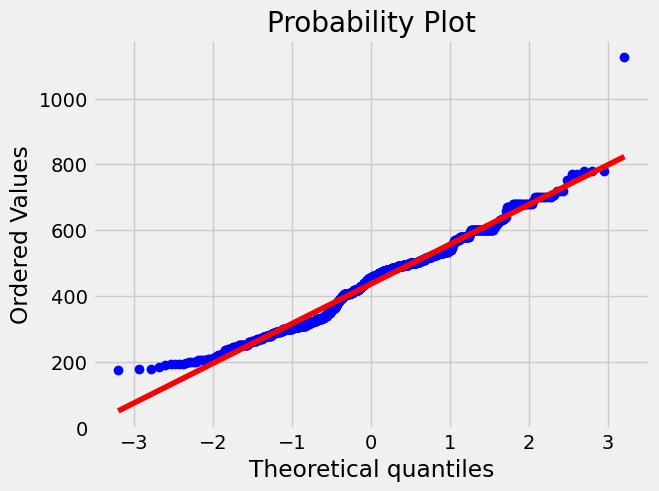

In [25]:
stats.probplot(poke_df["total_points"], dist="norm", plot=plt)

In [26]:
stat, pval = shapiro(poke_df["total_points"])
print("{:2f}".format(pval))

0.000000


In [27]:
norm_total, norm_lambda_2 = stats.boxcox(poke_df["total_points"])

(array([ 14.,  17.,  30.,  49., 111.,  79.,  45.,  79.,  76., 141., 160.,
         75.,  45.,  60.,   9.,  28.,   4.,   5.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([ 43.11160328,  47.34445756,  51.57731183,  55.81016611,
         60.04302039,  64.27587466,  68.50872894,  72.74158321,
         76.97443749,  81.20729176,  85.44014604,  89.67300031,
         93.90585459,  98.13870886, 102.37156314, 106.60441741,
        110.83727169, 115.07012597, 119.30298024, 123.53583452,
        127.76868879, 132.00154307, 136.23439734, 140.46725162,
        144.70010589, 148.93296017]),
 <BarContainer object of 25 artists>)

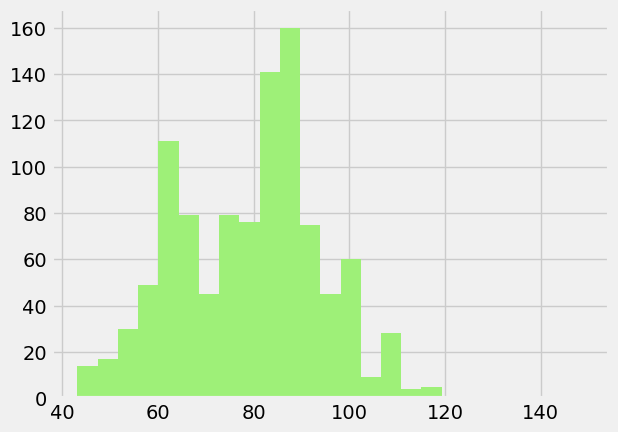

In [28]:
plt.hist(norm_total,bins=25, color="#9ef078")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([ 43.11160328,  43.94040844,  43.94040844, ..., 116.92880833,
         116.92880833, 148.93296017])),
 (14.747834399744171, 78.95434731714836, 0.9902095716405348))

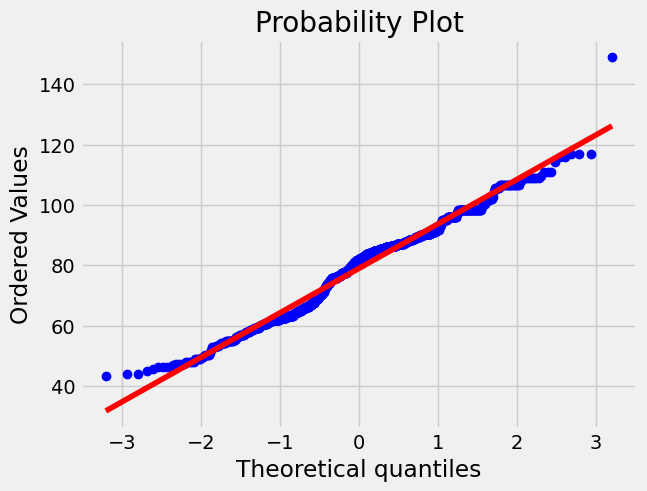

In [29]:
stats.probplot(norm_total, dist="norm", plot=plt)

In [30]:
stat, pval = shapiro(norm_total)
print("{:2f}".format(pval))

0.000000


<h4>Transform HP</h4>

(array([  3.,   6.,  23.,  84., 155., 165., 192., 154.,  87.,  75.,  42.,
         11.,  11.,   6.,   5.,   1.,   2.,   0.,   1.,   0.,   0.,   2.,
          0.,   0.,   3.]),
 array([  1.  ,  11.16,  21.32,  31.48,  41.64,  51.8 ,  61.96,  72.12,
         82.28,  92.44, 102.6 , 112.76, 122.92, 133.08, 143.24, 153.4 ,
        163.56, 173.72, 183.88, 194.04, 204.2 , 214.36, 224.52, 234.68,
        244.84, 255.  ]),
 <BarContainer object of 25 artists>)

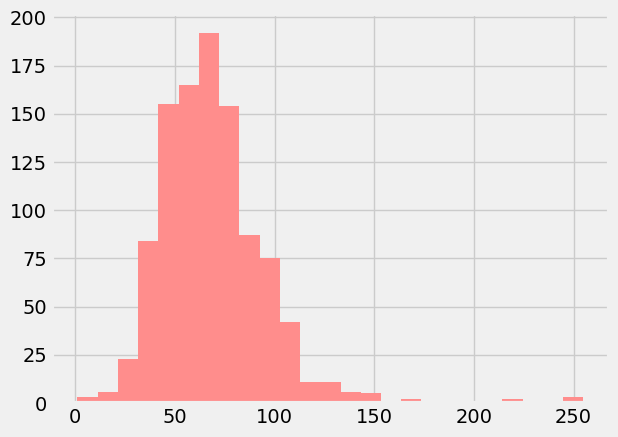

In [31]:
plt.hist(poke_df["hp"],bins=25, color="#ff8d8c")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([  1.,  10.,  10., ..., 250., 255., 255.])),
 (24.97137787583198, 69.57782101167315, 0.9442852347193029))

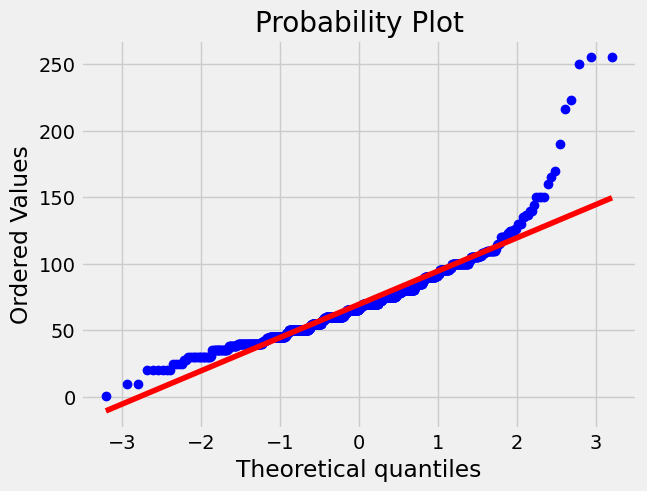

In [32]:
stats.probplot(poke_df["hp"], dist="norm", plot=plt)

In [33]:
stat, pval = shapiro(poke_df["hp"])
print("{:2f}".format(pval))

0.000000


In [34]:
norm_hp, norm_lambda_3 = stats.boxcox(poke_df["hp"])

(array([  1.,   0.,   0.,   0.,   0.,   2.,   0.,   6.,   4.,  19.,  30.,
        120., 143., 186., 191., 116., 126.,  46.,  18.,   7.,   6.,   1.,
          1.,   2.,   3.]),
 array([ 0.        ,  0.66711156,  1.33422311,  2.00133467,  2.66844623,
         3.33555778,  4.00266934,  4.6697809 ,  5.33689245,  6.00400401,
         6.67111557,  7.33822712,  8.00533868,  8.67245024,  9.33956179,
        10.00667335, 10.67378491, 11.34089646, 12.00800802, 12.67511958,
        13.34223114, 14.00934269, 14.67645425, 15.34356581, 16.01067736,
        16.67778892]),
 <BarContainer object of 25 artists>)

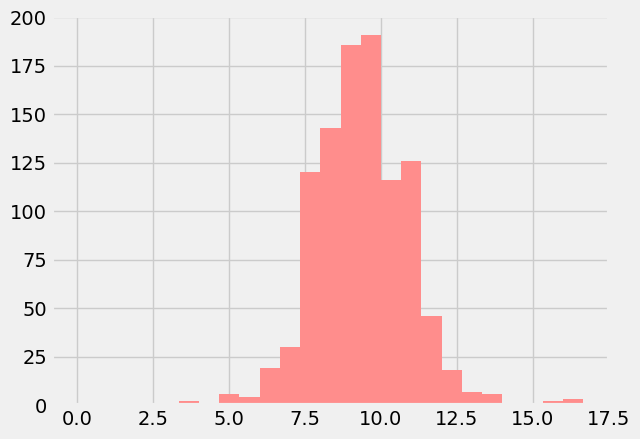

In [35]:
plt.hist(norm_hp,bins=25, color="#ff8d8c")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([ 0.        ,  3.51379411,  3.51379411, ..., 16.54467454,
         16.67778892, 16.67778892])),
 (1.5426656615094692, 9.42817944407525, 0.9847811096980874))

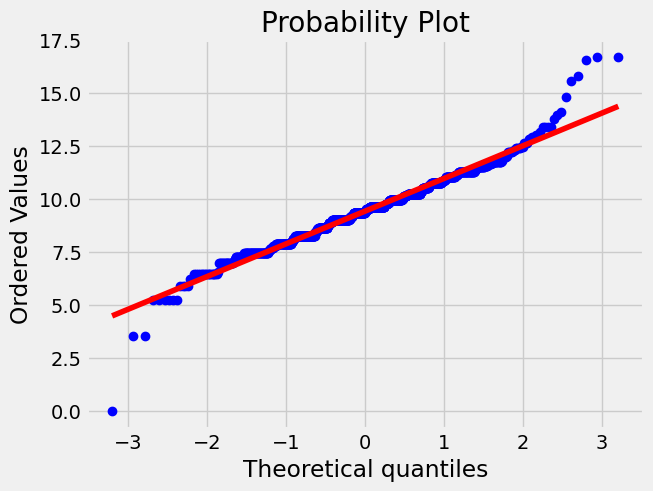

In [36]:
stats.probplot(norm_hp, dist="norm", plot=plt)

In [37]:
stat, pval = shapiro(norm_hp)
print("{:2f}".format(pval))

0.000000


<h4>Transform Defense</h4>

(array([  3.,  11.,  29., 101., 132., 137., 154., 116.,  98.,  87.,  45.,
         46.,  28.,  13.,  12.,   4.,   1.,   3.,   1.,   2.,   0.,   1.,
          3.,   0.,   1.]),
 array([  5. ,  14.8,  24.6,  34.4,  44.2,  54. ,  63.8,  73.6,  83.4,
         93.2, 103. , 112.8, 122.6, 132.4, 142.2, 152. , 161.8, 171.6,
        181.4, 191.2, 201. , 210.8, 220.6, 230.4, 240.2, 250. ]),
 <BarContainer object of 25 artists>)

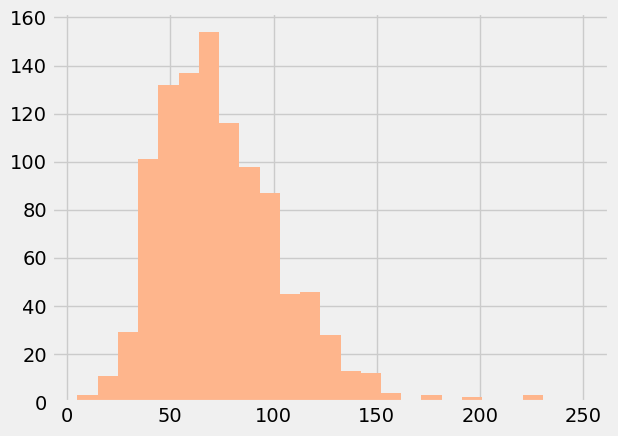

In [38]:
plt.hist(poke_df["defense"],bins=25, color="#feb58c")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([  5.,   5.,  10., ..., 230., 230., 250.])),
 (30.346017216010775, 74.47568093385215, 0.9672599637373089))

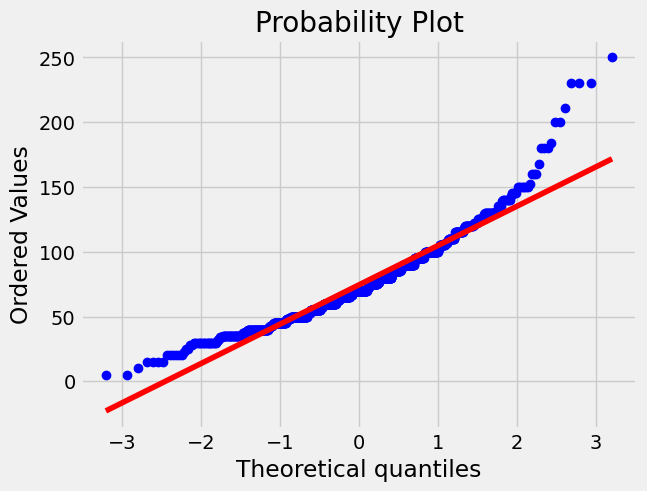

In [39]:
stats.probplot(poke_df["defense"], dist="norm", plot=plt)

In [40]:
stat, pval = shapiro(poke_df["defense"])
print("{:2f}".format(pval))

0.000000


In [41]:
norm_defense, norm_lambda = stats.boxcox(poke_df["defense"])

(array([  2.,   0.,   1.,   0.,   4.,   6.,   3.,  21.,  39.,  64., 123.,
         74., 141., 141., 104.,  99.,  90.,  56.,  25.,  20.,   4.,   4.,
          2.,   1.,   4.]),
 array([ 2.11429756,  2.6469427 ,  3.17958784,  3.71223299,  4.24487813,
         4.77752327,  5.31016841,  5.84281356,  6.3754587 ,  6.90810384,
         7.44074898,  7.97339413,  8.50603927,  9.03868441,  9.57132955,
        10.1039747 , 10.63661984, 11.16926498, 11.70191012, 12.23455526,
        12.76720041, 13.29984555, 13.83249069, 14.36513583, 14.89778098,
        15.43042612]),
 <BarContainer object of 25 artists>)

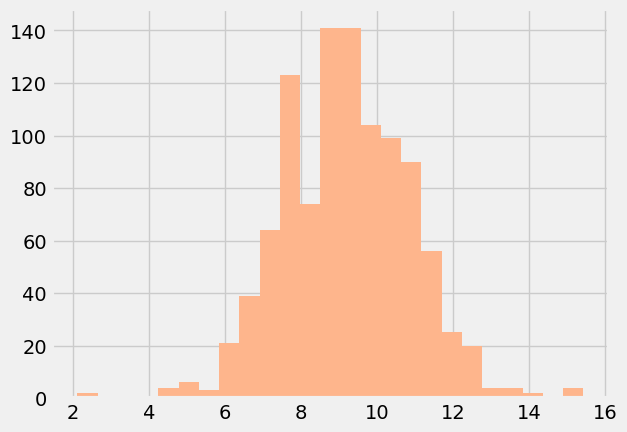

In [42]:
plt.hist(norm_defense,bins=25, color="#feb58c")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([ 2.11429756,  2.11429756,  3.42576481, ..., 14.93572969,
         14.93572969, 15.43042612])),
 (1.6699417396254586, 9.176556837128699, 0.995272159827817))

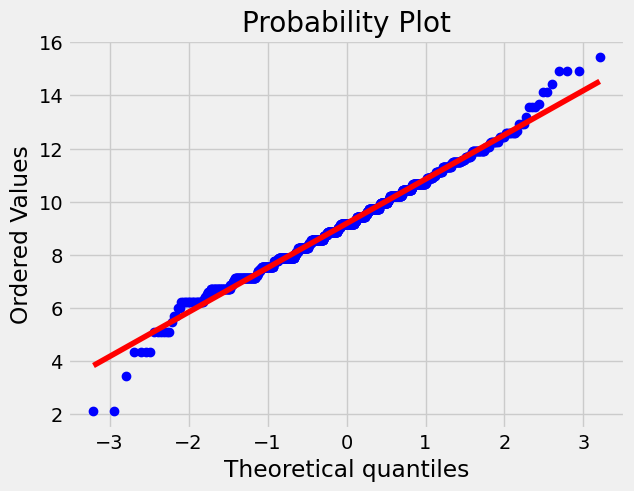

In [43]:
stats.probplot(norm_defense, dist="norm", plot=plt)

In [44]:
stat, pval = shapiro(norm_defense)
print("{:2f}".format(pval))

0.000010


<h4>Transform Special Attack</h4>

(array([  9.,  13.,  58.,  42., 123.,  77., 136.,  73.,  89.,  64.,  66.,
         62.,  61.,  32.,  29.,  22.,  28.,   8.,   7.,  14.,   3.,   6.,
          2.,   3.,   1.]),
 array([ 10.  ,  17.36,  24.72,  32.08,  39.44,  46.8 ,  54.16,  61.52,
         68.88,  76.24,  83.6 ,  90.96,  98.32, 105.68, 113.04, 120.4 ,
        127.76, 135.12, 142.48, 149.84, 157.2 , 164.56, 171.92, 179.28,
        186.64, 194.  ]),
 <BarContainer object of 25 artists>)

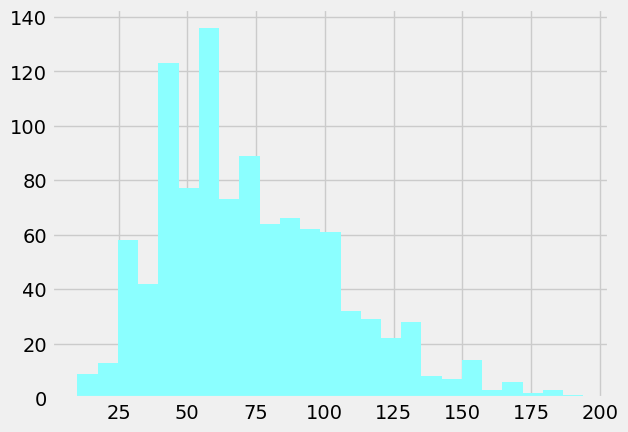

In [45]:
plt.hist(poke_df["sp_attack"],bins=25, color="#8bffff")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([ 10.,  10.,  10., ..., 180., 180., 194.])),
 (32.09962863209714, 72.73249027237354, 0.9801223929227321))

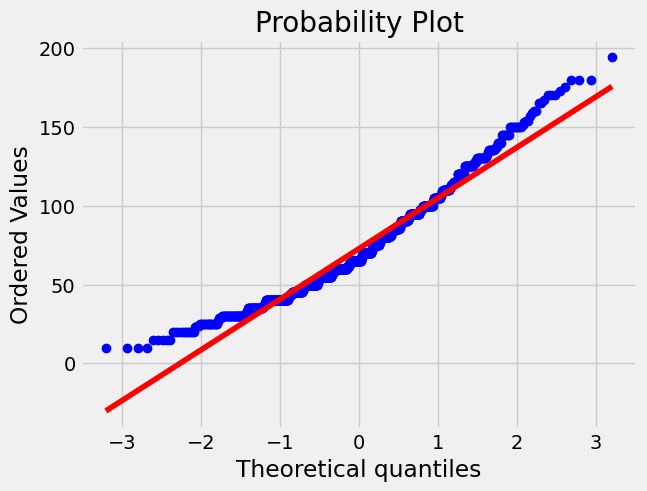

In [46]:
stats.probplot(poke_df["sp_attack"], dist="norm", plot=plt)

In [47]:
stat, pval = shapiro(poke_df["sp_attack"])
print("{:2f}".format(pval))

0.000000


In [48]:
norm_sp_attack, norm_lambda = stats.boxcox(poke_df["sp_attack"])

(array([  4.,   0.,   5.,  10.,   1.,  19.,  41.,  36.,  74.,  58.,  69.,
         74., 135.,  62.,  87.,  75.,  64.,  63.,  42.,  40.,  33.,  18.,
          8.,   6.,   4.]),
 array([ 3.47500639,  3.91573833,  4.35647028,  4.79720222,  5.23793416,
         5.6786661 ,  6.11939805,  6.56012999,  7.00086193,  7.44159387,
         7.88232582,  8.32305776,  8.7637897 ,  9.20452164,  9.64525358,
        10.08598553, 10.52671747, 10.96744941, 11.40818135, 11.8489133 ,
        12.28964524, 12.73037718, 13.17110912, 13.61184107, 14.05257301,
        14.49330495]),
 <BarContainer object of 25 artists>)

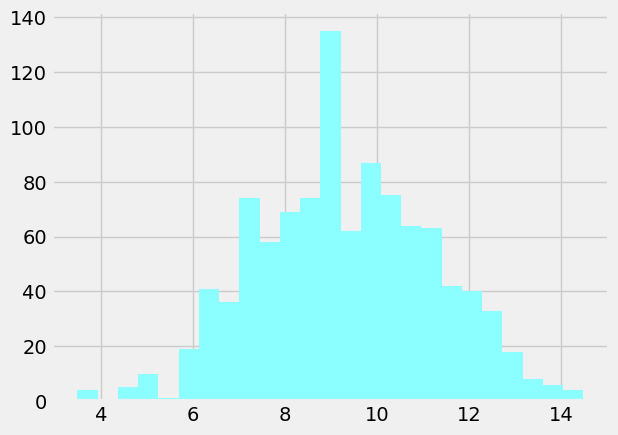

In [49]:
plt.hist(norm_sp_attack,bins=25, color="#8bffff")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([ 3.47500639,  3.47500639,  3.47500639, ..., 14.05921018,
         14.05921018, 14.49330495])),
 (1.910865073626032, 9.301532032043788, 0.9978805614327635))

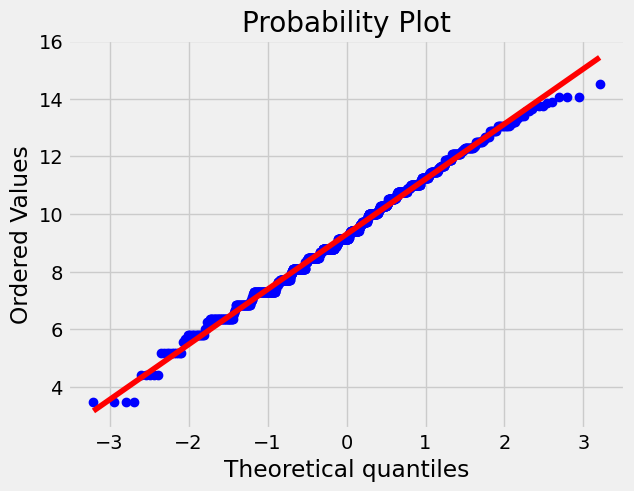

In [50]:
stats.probplot(norm_sp_attack, dist="norm", plot=plt)

In [51]:
stat, pval = shapiro(norm_sp_attack)
print("{:2f}".format(pval))

0.002902


<h4>Transform Special Defense</h4>

(array([ 20.,  66., 106., 155., 137., 137.,  84., 104.,  86.,  50.,  36.,
         19.,   9.,   4.,  10.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   1.]),
 array([ 20. ,  29.2,  38.4,  47.6,  56.8,  66. ,  75.2,  84.4,  93.6,
        102.8, 112. , 121.2, 130.4, 139.6, 148.8, 158. , 167.2, 176.4,
        185.6, 194.8, 204. , 213.2, 222.4, 231.6, 240.8, 250. ]),
 <BarContainer object of 25 artists>)

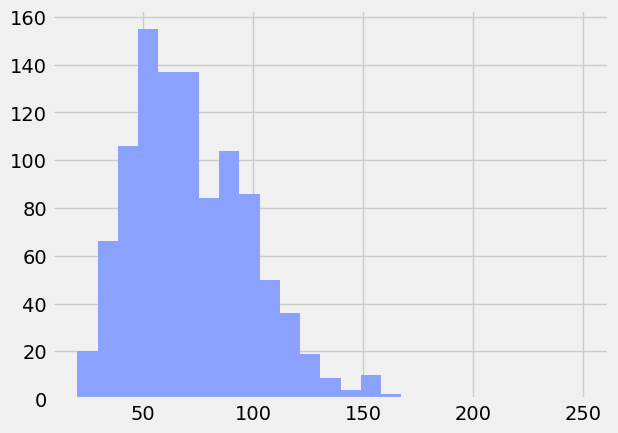

In [52]:
plt.hist(poke_df["sp_defense"],bins=25, color="#8aa1ff")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([ 20.,  20.,  20., ..., 200., 230., 250.])),
 (27.48923919462488, 72.13229571984436, 0.9766532759262239))

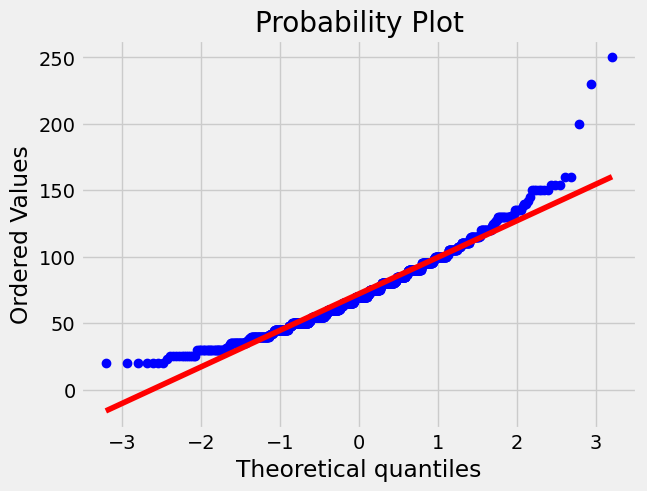

In [53]:
stats.probplot(poke_df["sp_defense"], dist="norm", plot=plt)

In [54]:
stat, pval = shapiro(poke_df["sp_defense"])
print("{:2f}".format(pval))

0.000000


In [55]:
norm_sp_defense, norm_lambda = stats.boxcox(poke_df["sp_defense"])

(array([  8.,  12.,  27.,   6.,  33.,  57.,  62., 134.,  77.,  76., 129.,
         83., 105.,  85.,  51.,  36.,  22.,   9.,  11.,   2.,   0.,   0.,
          1.,   1.,   1.]),
 array([ 4.67954582,  5.01719644,  5.35484705,  5.69249766,  6.03014828,
         6.36779889,  6.70544951,  7.04310012,  7.38075073,  7.71840135,
         8.05605196,  8.39370258,  8.73135319,  9.0690038 ,  9.40665442,
         9.74430503, 10.08195565, 10.41960626, 10.75725687, 11.09490749,
        11.4325581 , 11.77020872, 12.10785933, 12.44550994, 12.78316056,
        13.12081117]),
 <BarContainer object of 25 artists>)

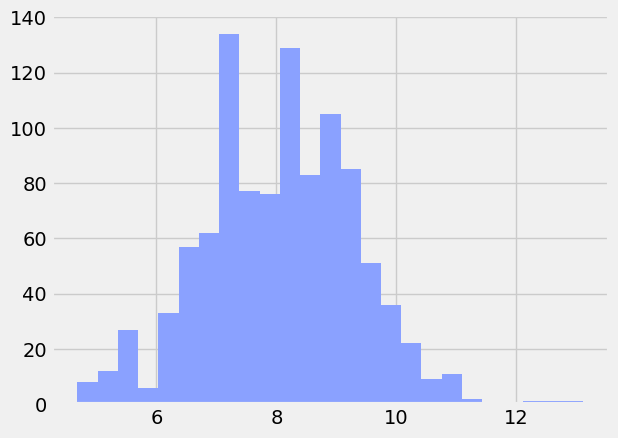

In [56]:
plt.hist(norm_sp_defense,bins=25, color="#8aa1ff")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([ 4.67954582,  4.67954582,  4.67954582, ..., 12.11384882,
         12.73719972, 13.12081117])),
 (1.2745045121498157, 8.05328868869461, 0.9975391370138793))

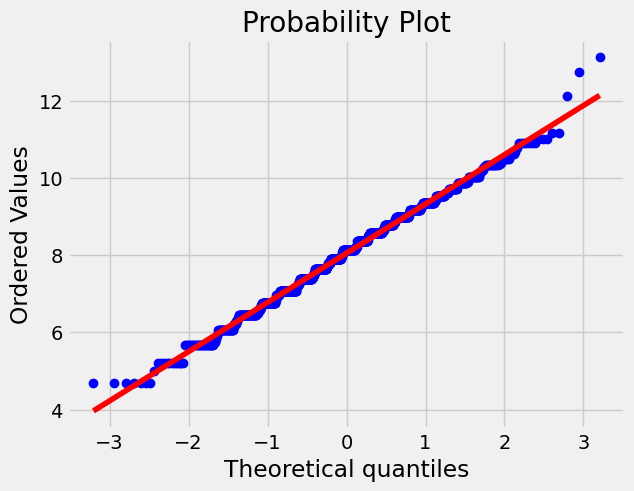

In [57]:
stats.probplot(norm_sp_defense, dist="norm", plot=plt)

In [58]:
stat, pval = shapiro(norm_sp_defense)
print("{:2f}".format(pval))

0.002120


<h4>Transform Speed</h4>

(array([ 20.,  43., 107., 179., 123., 138., 132., 106.,  79.,  57.,  23.,
          9.,  10.,   1.,   1.]),
 array([  5.        ,  16.66666667,  28.33333333,  40.        ,
         51.66666667,  63.33333333,  75.        ,  86.66666667,
         98.33333333, 110.        , 121.66666667, 133.33333333,
        145.        , 156.66666667, 168.33333333, 180.        ]),
 <BarContainer object of 15 artists>)

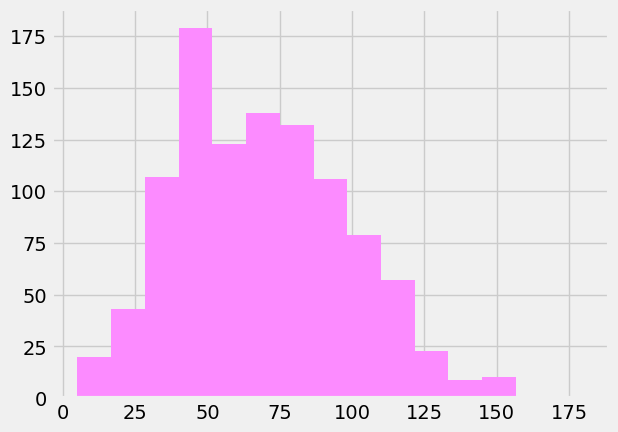

In [59]:
plt.hist(poke_df["speed"],bins=15, color="#fc8bff")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([  5.,   5.,   5., ..., 151., 160., 180.])),
 (29.62413392100696, 68.534046692607, 0.9918146395542089))

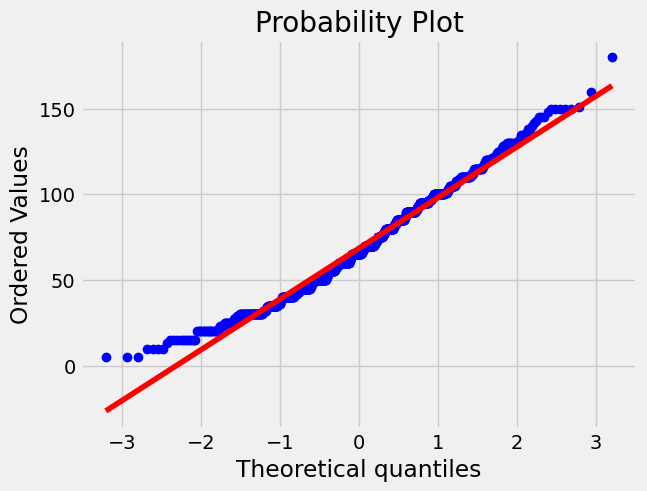

In [60]:
stats.probplot(poke_df["speed"], dist="norm", plot=plt)

In [61]:
stat, pval = shapiro(poke_df["speed"])
print("{:2f}".format(pval))

0.000000


In [62]:
norm_speed, norm_lambda = stats.boxcox(poke_df["speed"])

(array([  3.,   4.,   1.,  12.,  24.,  19.,  61.,  46., 104.,  75.,  49.,
         80., 119.,  54.,  92.,  90.,  64.,  55.,  32.,  22.,   7.,   7.,
          6.,   1.,   1.]),
 array([ 2.71799103,  4.06129131,  5.40459159,  6.74789187,  8.09119215,
         9.43449243, 10.77779271, 12.12109299, 13.46439327, 14.80769355,
        16.15099383, 17.49429411, 18.83759439, 20.18089467, 21.52419495,
        22.86749523, 24.21079551, 25.55409579, 26.89739607, 28.24069634,
        29.58399662, 30.9272969 , 32.27059718, 33.61389746, 34.95719774,
        36.30049802]),
 <BarContainer object of 25 artists>)

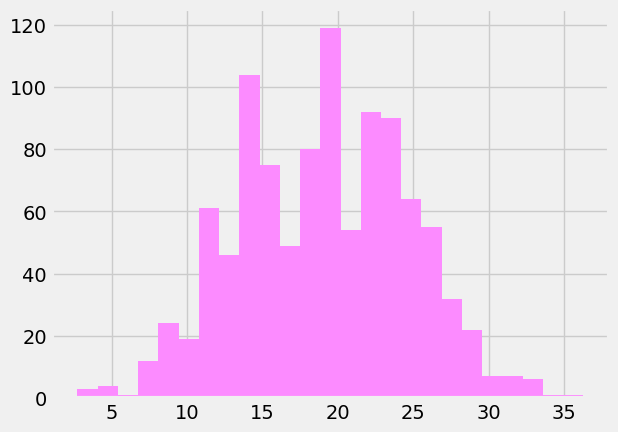

In [63]:
plt.hist(norm_speed,bins=25, color="#fc8bff")

((array([-3.20554261, -2.94093949, -2.79331915, ...,  2.79331915,
          2.94093949,  3.20554261]),
  array([ 2.71799103,  2.71799103,  2.71799103, ..., 32.4861415 ,
         33.69880763, 36.30049802])),
 (5.677425399701458, 19.036529353279782, 0.9975161288157548))

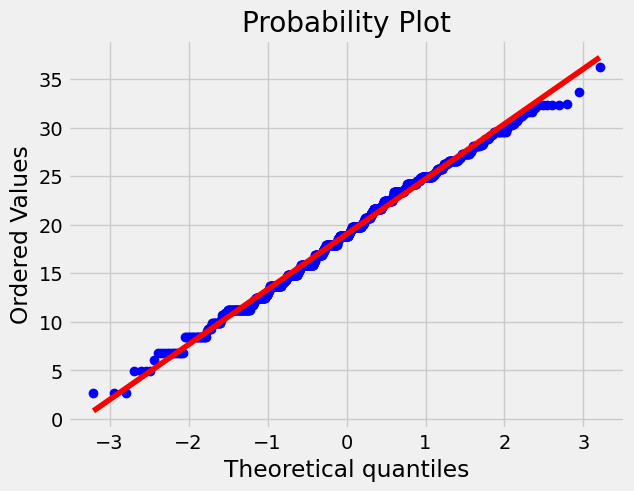

In [64]:
stats.probplot(norm_speed, dist="norm", plot=plt)

In [65]:
stat, pval = shapiro(norm_speed)
print("{:2f}".format(pval))

0.000979


Regardless of the results in the p-values across the columns, if we rely on the Q-Q plots, the box-cox method seems to work as the data points were aligned in a straight diagonal line. Since we have introduced changes into our data, it would be wise to copy the dataframe and then use the copy to replace the old data with the newly transformed data. Use the `.copy()` method to copy the dataframe.

In [66]:
pokemon_df = poke_df.copy()

Next, drop the old columns using the `.drop()` method.

In [67]:
pokemon_df.drop(["total_points", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"], axis = 1, inplace = True)

In [68]:
pokemon_df.columns

Index(['Unnamed: 0', 'pokedex_number', 'name', 'generation', 'status',
       'species', 'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'catch_rate', 'base_friendship', 'base_experience', 'growth_rate',
       'egg_type_number', 'egg_type_1', 'egg_type_2', 'percentage_male',
       'egg_cycles', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fight',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy'],
      dtype='object')

Then, add the normalized series into the dataframe.

In [69]:
pokemon_df["total_points"] = norm_total
pokemon_df["hp"] = norm_hp
pokemon_df["attack"] = norm_attack
pokemon_df["defense"] = norm_defense
pokemon_df["sp_attack"] = norm_sp_attack
pokemon_df["sp_defense"] = norm_sp_defense
pokemon_df["speed"] = norm_speed

In [70]:
pokemon_df

Unnamed: 0  pokedex_number                            name  generation  \
0              0               1                       Bulbasaur           1   
1              1               2                         Ivysaur           1   
2              2               3                        Venusaur           1   
3              3               3                   Mega Venusaur           1   
4              4               4                      Charmander           1   
...          ...             ...                             ...         ...   
1023        1023             888     Zacian Hero of Many Battles           8   
1024        1024             889        Zamazenta Crowned Shield           8   
1025        1025             889  Zamazenta Hero of Many Battles           8   
1026        1026             890                       Eternatus           8   
1027        1027             890             Eternatus Eternamax           8   

         status           species  type_number    type_1  type_2  height_m  \
0        Normal      Seed Pokémon            2     Grass  Poison       0.7   
1        Normal      Seed Pokémon            2     Grass  Poison       1.0   
2        Normal      Seed Pokémon            2     Grass  Poison       2.0   
3        Normal      Seed Pokémon            2     Grass  Poison       2.4   
4        Normal    Lizard Pokémon            1      Fire     NaN       0.6   
...         ...               ...          ...       ...     ...       ...   
1023  Legendary   Warrior Pokémon            1     Fairy     NaN       2.8   
1024  Legendary   Warrior Pokémon            2  Fighting   Steel       2.9   
1025  Legendary   Warrior Pokémon            1  Fighting     NaN       2.9   
1026  Legendary  Gigantic Pokémon            2    Poison  Dragon      20.0   
1027  Legendary  Gigantic Pokémon            2    Poison  Dragon     100.0   

      ...  against_dark  against_steel against_fairy total_points         hp  \
0     ...           1.0            1.0           0.5    64.405507   7.869855   
1     ...           1.0            1.0           0.5    75.684971   8.992112   
2     ...           1.0            1.0           0.5    89.943659  10.231281   
3     ...           1.0            1.0           0.5   100.973962  10.231281   
4     ...           1.0            0.5           0.5    63.180900   7.351693   
...   ...           ...            ...           ...          ...        ...   
1023  ...           0.5            2.0           1.0   105.734846  10.879085   
1024  ...           0.5            0.5           1.0   110.896381  10.879085   
1025  ...           0.5            1.0           2.0   105.734846  10.879085   
1026  ...           1.0            1.0           1.0   107.814977  13.023700   
1027  ...           1.0            1.0           1.0   148.932960  16.677789   

         attack    defense  sp_attack sp_defense      speed  
0     14.480498   7.821703   9.122636   7.892982  14.799665  
1     16.822161   8.749062   9.996736   8.576651  17.916299  
2     20.047523   9.857433  11.006626   9.356808  21.623107  
3     22.671467  11.620898  11.972630  10.031234  21.623107  
4     15.042381   7.368800   8.801630   7.083790  18.883970  
...         ...        ...        ...        ...        ...  
1023  26.631565  11.303195   9.996736   9.870724  30.682520  
1024  26.631565  12.428151   9.996736  10.768441  29.248740  
1025  26.631565  11.303195   9.996736   9.870724  30.682520  
1026  20.500775  10.437609  12.865649   9.173160  29.538959  
1027  24.706849  15.430426  12.095127  13.120811  29.538959  

[1028 rows x 49 columns]

After the process of transforming the data in its normalized form, we can then move on to aggregation.

<h3>Aggregation</h3>

Aggregation summarizes data belonging to the same group or category. Numerical data and categorical data can be summarized using aggregation. This method can be used to get the overall mean, median, or mode of a series.

Since no two Pokemon have identical individual statistics and the modelling technique relies on individual statistics, aggregation will not be used to provide the complete information needed for data modelling. Thus, we are skipping this process.

<h3>Column Transformation</h3>

If we want to separate data from one column into two columns (e.g. full name -> last name, given name), we can use column transformation. When looking at the dataset, there is no way we can implement column transformation. We cannot split the name, species, ability 1, ability 2, or hidden ability as it will not make sense if we do split the values.

<h3>Feature Scaling</h3>

Feature Scaling is a method that standardizes data in a given range. Unlike log transformation - a method that normalizes data between 0 or 1 - feature scaling takes into account the distances of each point from the mean or, to simply put, the standard deviation. 

Considering that we will be using an algorithm that computes for the Euclidean distance of points, we perform feature scaling and then use the standardized values for our computation. Since clustering revolves around calculating the distance of points from the centroids, standardizing the data would be beneficial as the effect of outliers is minimal unlike when we use log transformation. Moreover, it speeds up the calculation process of the algorithm we will be using.
<figure>
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/standard.png" style="width: 20%">
    <figcaption style="text-align: center">Formula for the Z-Score</figcaption>
</figure>
The formula above is used to compute the z-score, where <b>x</b> is the data point, <b>μ</b> is the mean, and <b>ơ</b> is the standard deviation. The z-score tells us how many standard deviations away from the mean is the data point.
<bR>
To perform feature scaling on our data, we install the package by inputting `pip install sklearn` or `conda install sklearn` in the command line. Next, import the method `StandardScaler` from the package `preprocessing` under the library called `sklearn`, also known as <b>SciKit-Learn</b>. This library specializes on machine learning for Python users and it contains various algorithms used in the learning process.

In [71]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [72]:
from sklearn.preprocessing import StandardScaler

After importing the library, use the `.fit()` function to reformat the data into its standardized versions. This calculates for the mean and standard deviations of each data point.

In [73]:
pokemon_df[["total_points", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]]

total_points         hp     attack    defense  sp_attack  sp_defense  \
0        64.405507   7.869855  14.480498   7.821703   9.122636    7.892982   
1        75.684971   8.992112  16.822161   8.749062   9.996736    8.576651   
2        89.943659  10.231281  20.047523   9.857433  11.006626    9.356808   
3       100.973962  10.231281  22.671467  11.620898  11.972630   10.031234   
4        63.180900   7.351693  15.042381   7.368800   8.801630    7.083790   
...            ...        ...        ...        ...        ...         ...   
1023    105.734846  10.879085  26.631565  11.303195   9.996736    9.870724   
1024    110.896381  10.879085  26.631565  12.428151   9.996736   10.768441   
1025    105.734846  10.879085  26.631565  11.303195   9.996736    9.870724   
1026    107.814977  13.023700  20.500775  10.437609  12.865649    9.173160   
1027    148.932960  16.677789  24.706849  15.430426  12.095127   13.120811   

          speed  
0     14.799665  
1     17.916299  
2     21.623107  
3     21.623107  
4     18.883970  
...         ...  
1023  30.682520  
1024  29.248740  
1025  30.682520  
1026  29.538959  
1027  29.538959  

[1028 rows x 7 columns]

In [74]:
sd_scaler = StandardScaler()
standardized_features = sd_scaler.fit_transform(pokemon_df[["total_points", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]])

Since we have an array of the standardized features, convert them to a dataframe. Drop the old columns and then concatenate this dataframe into the `pokemon_df` dataframe.

In [75]:
sd_feat_df = pd.DataFrame(standardized_features, columns=["total_points", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"])
sd_feat_df

total_points        hp    attack   defense  sp_attack  sp_defense  \
0        -0.979505 -0.997483 -0.957474 -0.809678  -0.093676   -0.125811   
1        -0.220112 -0.279126 -0.493284 -0.255477   0.364033    0.410743   
2         0.739859  0.514065  0.146082  0.406901   0.892845    1.023024   
3         1.482478  0.514065  0.666228  1.460770   1.398679    1.552324   
4        -1.061952 -1.329158 -0.846091 -1.080339  -0.261766   -0.760878   
...            ...       ...       ...       ...        ...         ...   
1023      1.803006  0.928724  1.451242  1.270907   0.364033    1.426353   
1024      2.150508  0.928724  1.451242  1.943195   0.364033    2.130896   
1025      1.803006  0.928724  1.451242  1.270907   0.364033    1.426353   
1026      1.943051  2.301491  0.235930  0.753621   1.866294    0.878894   
1027      4.711333  4.640471  1.069704  3.737394   1.462822    3.977075   

         speed  
0    -0.746436  
1    -0.197358  
2     0.455694  
3     0.455694  
4    -0.026877  
...        ...  
1023  2.051750  
1024  1.799152  
1025  2.051750  
1026  1.850282  
1027  1.850282  

[1028 rows x 7 columns]

In [76]:
pokemon_df.drop(["total_points", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"], axis = 1, inplace = True)

In [77]:
pokemon_df = pd.concat([pokemon_df, sd_feat_df], axis=1, join='outer')
pokemon_df

Unnamed: 0  pokedex_number                            name  generation  \
0              0               1                       Bulbasaur           1   
1              1               2                         Ivysaur           1   
2              2               3                        Venusaur           1   
3              3               3                   Mega Venusaur           1   
4              4               4                      Charmander           1   
...          ...             ...                             ...         ...   
1023        1023             888     Zacian Hero of Many Battles           8   
1024        1024             889        Zamazenta Crowned Shield           8   
1025        1025             889  Zamazenta Hero of Many Battles           8   
1026        1026             890                       Eternatus           8   
1027        1027             890             Eternatus Eternamax           8   

         status           species  type_number    type_1  type_2  height_m  \
0        Normal      Seed Pokémon            2     Grass  Poison       0.7   
1        Normal      Seed Pokémon            2     Grass  Poison       1.0   
2        Normal      Seed Pokémon            2     Grass  Poison       2.0   
3        Normal      Seed Pokémon            2     Grass  Poison       2.4   
4        Normal    Lizard Pokémon            1      Fire     NaN       0.6   
...         ...               ...          ...       ...     ...       ...   
1023  Legendary   Warrior Pokémon            1     Fairy     NaN       2.8   
1024  Legendary   Warrior Pokémon            2  Fighting   Steel       2.9   
1025  Legendary   Warrior Pokémon            1  Fighting     NaN       2.9   
1026  Legendary  Gigantic Pokémon            2    Poison  Dragon      20.0   
1027  Legendary  Gigantic Pokémon            2    Poison  Dragon     100.0   

      ...  against_dark  against_steel against_fairy total_points        hp  \
0     ...           1.0            1.0           0.5    -0.979505 -0.997483   
1     ...           1.0            1.0           0.5    -0.220112 -0.279126   
2     ...           1.0            1.0           0.5     0.739859  0.514065   
3     ...           1.0            1.0           0.5     1.482478  0.514065   
4     ...           1.0            0.5           0.5    -1.061952 -1.329158   
...   ...           ...            ...           ...          ...       ...   
1023  ...           0.5            2.0           1.0     1.803006  0.928724   
1024  ...           0.5            0.5           1.0     2.150508  0.928724   
1025  ...           0.5            1.0           2.0     1.803006  0.928724   
1026  ...           1.0            1.0           1.0     1.943051  2.301491   
1027  ...           1.0            1.0           1.0     4.711333  4.640471   

        attack   defense  sp_attack sp_defense     speed  
0    -0.957474 -0.809678  -0.093676  -0.125811 -0.746436  
1    -0.493284 -0.255477   0.364033   0.410743 -0.197358  
2     0.146082  0.406901   0.892845   1.023024  0.455694  
3     0.666228  1.460770   1.398679   1.552324  0.455694  
4    -0.846091 -1.080339  -0.261766  -0.760878 -0.026877  
...        ...       ...        ...        ...       ...  
1023  1.451242  1.270907   0.364033   1.426353  2.051750  
1024  1.451242  1.943195   0.364033   2.130896  1.799152  
1025  1.451242  1.270907   0.364033   1.426353  2.051750  
1026  0.235930  0.753621   1.866294   0.878894  1.850282  
1027  1.069704  3.737394   1.462822   3.977075  1.850282  

[1028 rows x 49 columns]

<h3>Feature Engineering</h3>

Finally, if we want to introduce new variables into our dataset, we can use feature engineering. Based on given series of data, feature engineering can be employed [e.g. BMI calculation (from weight_kg and height_m)].

However, our chosen data modelling technique and research question relies on the Pokemon's statistics and nothing more. All other features are already given in the dataset. Hence, there is no need to extract values to create new values.

<p style="color: #f0789f; font-weight: bold">🍚🍜 With all that, we can now conclude the data preprocessing chapter of the notebook. We can now proceed with modelling our finally-cleaned dataset.🍣🍙</p>

<h3>🍱 K-Means Clustering 🍱</h3>

<p style="font-weight: bold">🤔 Research Question 🤔: <span style="color: #8aa1ff;">What is the relation between pokemon generation and type 1 element to health points, defense, special attack, special defense, and speed?</span></p>

When analyzing the research question, it implies that grouping all the Pokemon based on their generation and primary element will be the intuition. Looking at the data modelling algorithms discussed in class, <b>clustering</b> is the most appropriate to implement that sort of intuition into action to get the desired results. 

There are two types of clustering: <b>(1) Hierarchical</b>, and <b>(2) K-Means</b>. Since hierarchical clustering does not handle varied data types and large amounts of data, we will use the <b>K-Means clustering</b> method to divide the data into groups. Moreover, K-Means works faster than hierarchical clustering when used on large datasets.

<h4>Elbow Method</h4>

To get started with clustering, it is important to determine how many clusters we have to use to group all the Pokemon. We can think of using 8 clusters if we base our reasoning on how many generations there are or 18 clusters for the same reason but for types. However, we have to use the formal way of determining the number of clusters the algorithm will use.

The <b>elbow method</b> helps you calculate the number of Ks the dataset can use. Ks are another term for clusters, hence the name <i>K-Means</i>. To employ the elbow method into the notebook, make use of the `KMeans` function from the sklearn package. We can set the maximum clusters to 18 just in case.

In [78]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [79]:
# declare a list to keep the inertia of each number between 1 and max_clusters (30)
inertia_list = []
inertia_mappings = {}

# use a for loop for the elbow method
for each in range(1, 18):
    # cluster the dataset based on the amount of 'each'
    k_means = KMeans(n_clusters = each)

    # calculate for the mean and standard deviation of the features
    k_means.fit(standardized_features)

    # append the calculated inertia into the inertia list
    inertia_list.append(k_means.inertia_)

    # get the mappings of the sum of the minimum euclidean distances between each point
    # then divide the sum by the total number of observations/Pokemon
    inertia_mappings[each] = sum(np.min(cdist(standardized_features, k_means.cluster_centers_, 
    'euclidean'), axis=1)) / standardized_features.shape[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Next, plot the inertias on a line graph to find out where the bend of the curve is located. That will determine the optimal number of clusters to use. Use the `.plot()` function.

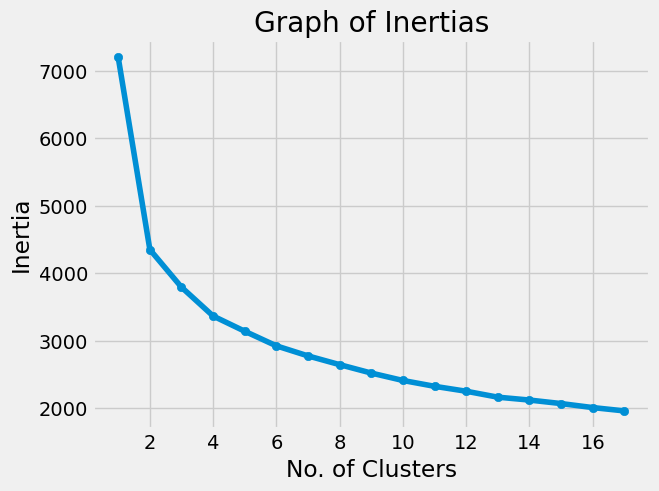

In [80]:
# plot the line of the inertias
plt.plot(range(1, 18), inertia_list)

# plot the point of the inertias
plt.scatter(range(1, 18), inertia_list)

# describe the graph
plt.title("Graph of Inertias")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")

# reveal
plt.show() 

We can also print out the inertias below and observe when the inertia drops and slows down.

In [81]:
for x, y in inertia_mappings.items():
    print(f"{x} : {y}")

1 : 2.44238333507836
2 : 1.8897065357320786
3 : 1.7609507445750412
4 : 1.6528554212184037
5 : 1.5915968208825264
6 : 1.5342767434530933
7 : 1.5014421749141669
8 : 1.4688652610889639
9 : 1.4309515970723765
10 : 1.3941529607628471
11 : 1.3728108606881109
12 : 1.3654244453632658
13 : 1.3367291375978658
14 : 1.3162782878277626
15 : 1.29954469353907
16 : 1.280613084276846
17 : 1.2650932183006105


If we want to make sure we have the right number of clusters to use, use the `KneeLocator` from the `kneed` library. The kneed library can detect where the elbow is on the graph. Install the package first into the notebook.

In [82]:
!pip install --upgrade kneed

Defaulting to user installation because normal site-packages is not writeable
  Using cached kneed-0.8.5-py3-none-any.whl (10 kB)
  Attempting uninstall: kneed
    Found existing installation: kneed 0.8.1
    Uninstalling kneed-0.8.1:
      Successfully uninstalled kneed-0.8.1


In [83]:
!pip install kneed==0.8.1

Defaulting to user installation because normal site-packages is not writeable
  Using cached kneed-0.8.1-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: kneed
    Found existing installation: kneed 0.8.5
    Uninstalling kneed-0.8.5:
      Successfully uninstalled kneed-0.8.5


In [84]:
from kneed import KneeLocator

In [85]:
ideal_no = KneeLocator(range(1, 18), inertia_list, curve="convex", direction="decreasing")
ideal_no.elbow

4

Based on the graph and list of inertias, a steady decrease in inertia starts if we set our number of clusters at <b>4</b>. This means that the algorithm has found 4 patterns of each Pokemon's individual statistics. Now that we found that the optimal number of clusters is 4, we can then start clustering our dataset.

<h4>Clustering</h4>

To begin clustering, use the `KMeans` function and set the `n_clusters` to <b>4</b>. Create another copy of the pokemon dataframe as a checkpoint in case mistakes have occurred.

In [86]:
sets = ['total_points', 'hp', 'attack','defense','sp_attack','sp_defense','speed']

In [87]:
clustered_poke_df = pokemon_df.copy()

In [88]:
kmeans = KMeans(n_clusters = 4,
init = 'random',             # Initialization method for kmeans
max_iter = 300,                 # Maximum number of iterations
n_init = 10,                    # Choose how often algorithm will run with different centroid
random_state = 1)               # Choose random state for reproducibility

Get the mean and standard deviations of each points using the `.fit()` function and create a column in the dataframe listing the clusters where each Pokemon belong to. With that, we can view the dataframe and see the clusters the Pokemon is assigned.

In [89]:
kmeans.fit(standardized_features)

KMeans(init='random', n_clusters=4, random_state=1)

In [90]:
clustered_poke_df["cluster"] = kmeans.labels_

In [91]:
clustered_poke_df

Unnamed: 0  pokedex_number                            name  generation  \
0              0               1                       Bulbasaur           1   
1              1               2                         Ivysaur           1   
2              2               3                        Venusaur           1   
3              3               3                   Mega Venusaur           1   
4              4               4                      Charmander           1   
...          ...             ...                             ...         ...   
1023        1023             888     Zacian Hero of Many Battles           8   
1024        1024             889        Zamazenta Crowned Shield           8   
1025        1025             889  Zamazenta Hero of Many Battles           8   
1026        1026             890                       Eternatus           8   
1027        1027             890             Eternatus Eternamax           8   

         status           species  type_number    type_1  type_2  height_m  \
0        Normal      Seed Pokémon            2     Grass  Poison       0.7   
1        Normal      Seed Pokémon            2     Grass  Poison       1.0   
2        Normal      Seed Pokémon            2     Grass  Poison       2.0   
3        Normal      Seed Pokémon            2     Grass  Poison       2.4   
4        Normal    Lizard Pokémon            1      Fire     NaN       0.6   
...         ...               ...          ...       ...     ...       ...   
1023  Legendary   Warrior Pokémon            1     Fairy     NaN       2.8   
1024  Legendary   Warrior Pokémon            2  Fighting   Steel       2.9   
1025  Legendary   Warrior Pokémon            1  Fighting     NaN       2.9   
1026  Legendary  Gigantic Pokémon            2    Poison  Dragon      20.0   
1027  Legendary  Gigantic Pokémon            2    Poison  Dragon     100.0   

      ...  against_steel  against_fairy total_points        hp    attack  \
0     ...            1.0            0.5    -0.979505 -0.997483 -0.957474   
1     ...            1.0            0.5    -0.220112 -0.279126 -0.493284   
2     ...            1.0            0.5     0.739859  0.514065  0.146082   
3     ...            1.0            0.5     1.482478  0.514065  0.666228   
4     ...            0.5            0.5    -1.061952 -1.329158 -0.846091   
...   ...            ...            ...          ...       ...       ...   
1023  ...            2.0            1.0     1.803006  0.928724  1.451242   
1024  ...            0.5            1.0     2.150508  0.928724  1.451242   
1025  ...            1.0            2.0     1.803006  0.928724  1.451242   
1026  ...            1.0            1.0     1.943051  2.301491  0.235930   
1027  ...            1.0            1.0     4.711333  4.640471  1.069704   

       defense  sp_attack  sp_defense     speed  cluster  
0    -0.809678  -0.093676   -0.125811 -0.746436        3  
1    -0.255477   0.364033    0.410743 -0.197358        0  
2     0.406901   0.892845    1.023024  0.455694        2  
3     1.460770   1.398679    1.552324  0.455694        2  
4    -1.080339  -0.261766   -0.760878 -0.026877        3  
...        ...        ...         ...       ...      ...  
1023  1.270907   0.364033    1.426353  2.051750        2  
1024  1.943195   0.364033    2.130896  1.799152        2  
1025  1.270907   0.364033    1.426353  2.051750        2  
1026  0.753621   1.866294    0.878894  1.850282        2  
1027  3.737394   1.462822    3.977075  1.850282        2  

[1028 rows x 50 columns]

<h3>🔎 Data Exploration 🔍</h3>

Now that we have modelled our data, we can now explore it using visuals. We also want to discover how distinct each cluster is, or what makes them different from the other clusters. 

Before that, import the `seaborn` library. We can also use different color palettes for the visuals. For this notebook, we will use the `pastel` palette.

In [92]:
import seaborn as sns

In [93]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

If we want to know which cluster is the most powerful, we can use the `.scatterplot()` method from the seaborn library.

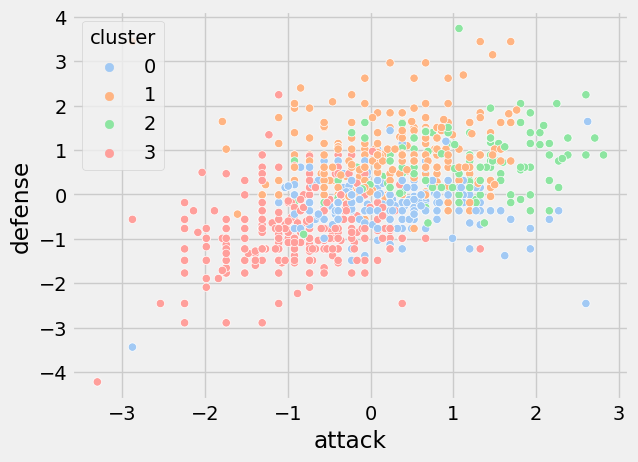

In [94]:
sns.scatterplot(x = clustered_poke_df["attack"], y = clustered_poke_df["defense"], hue = clustered_poke_df["cluster"], palette = "pastel");

Additionally, if we want to save time, we can use the `.pairplot()` function. This pairs every category of statistic (e.g. attack, defense, etc) to each other to generate scatter plots of every combination. 

In [95]:
stats_set = clustered_poke_df[["total_points", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "cluster"]]

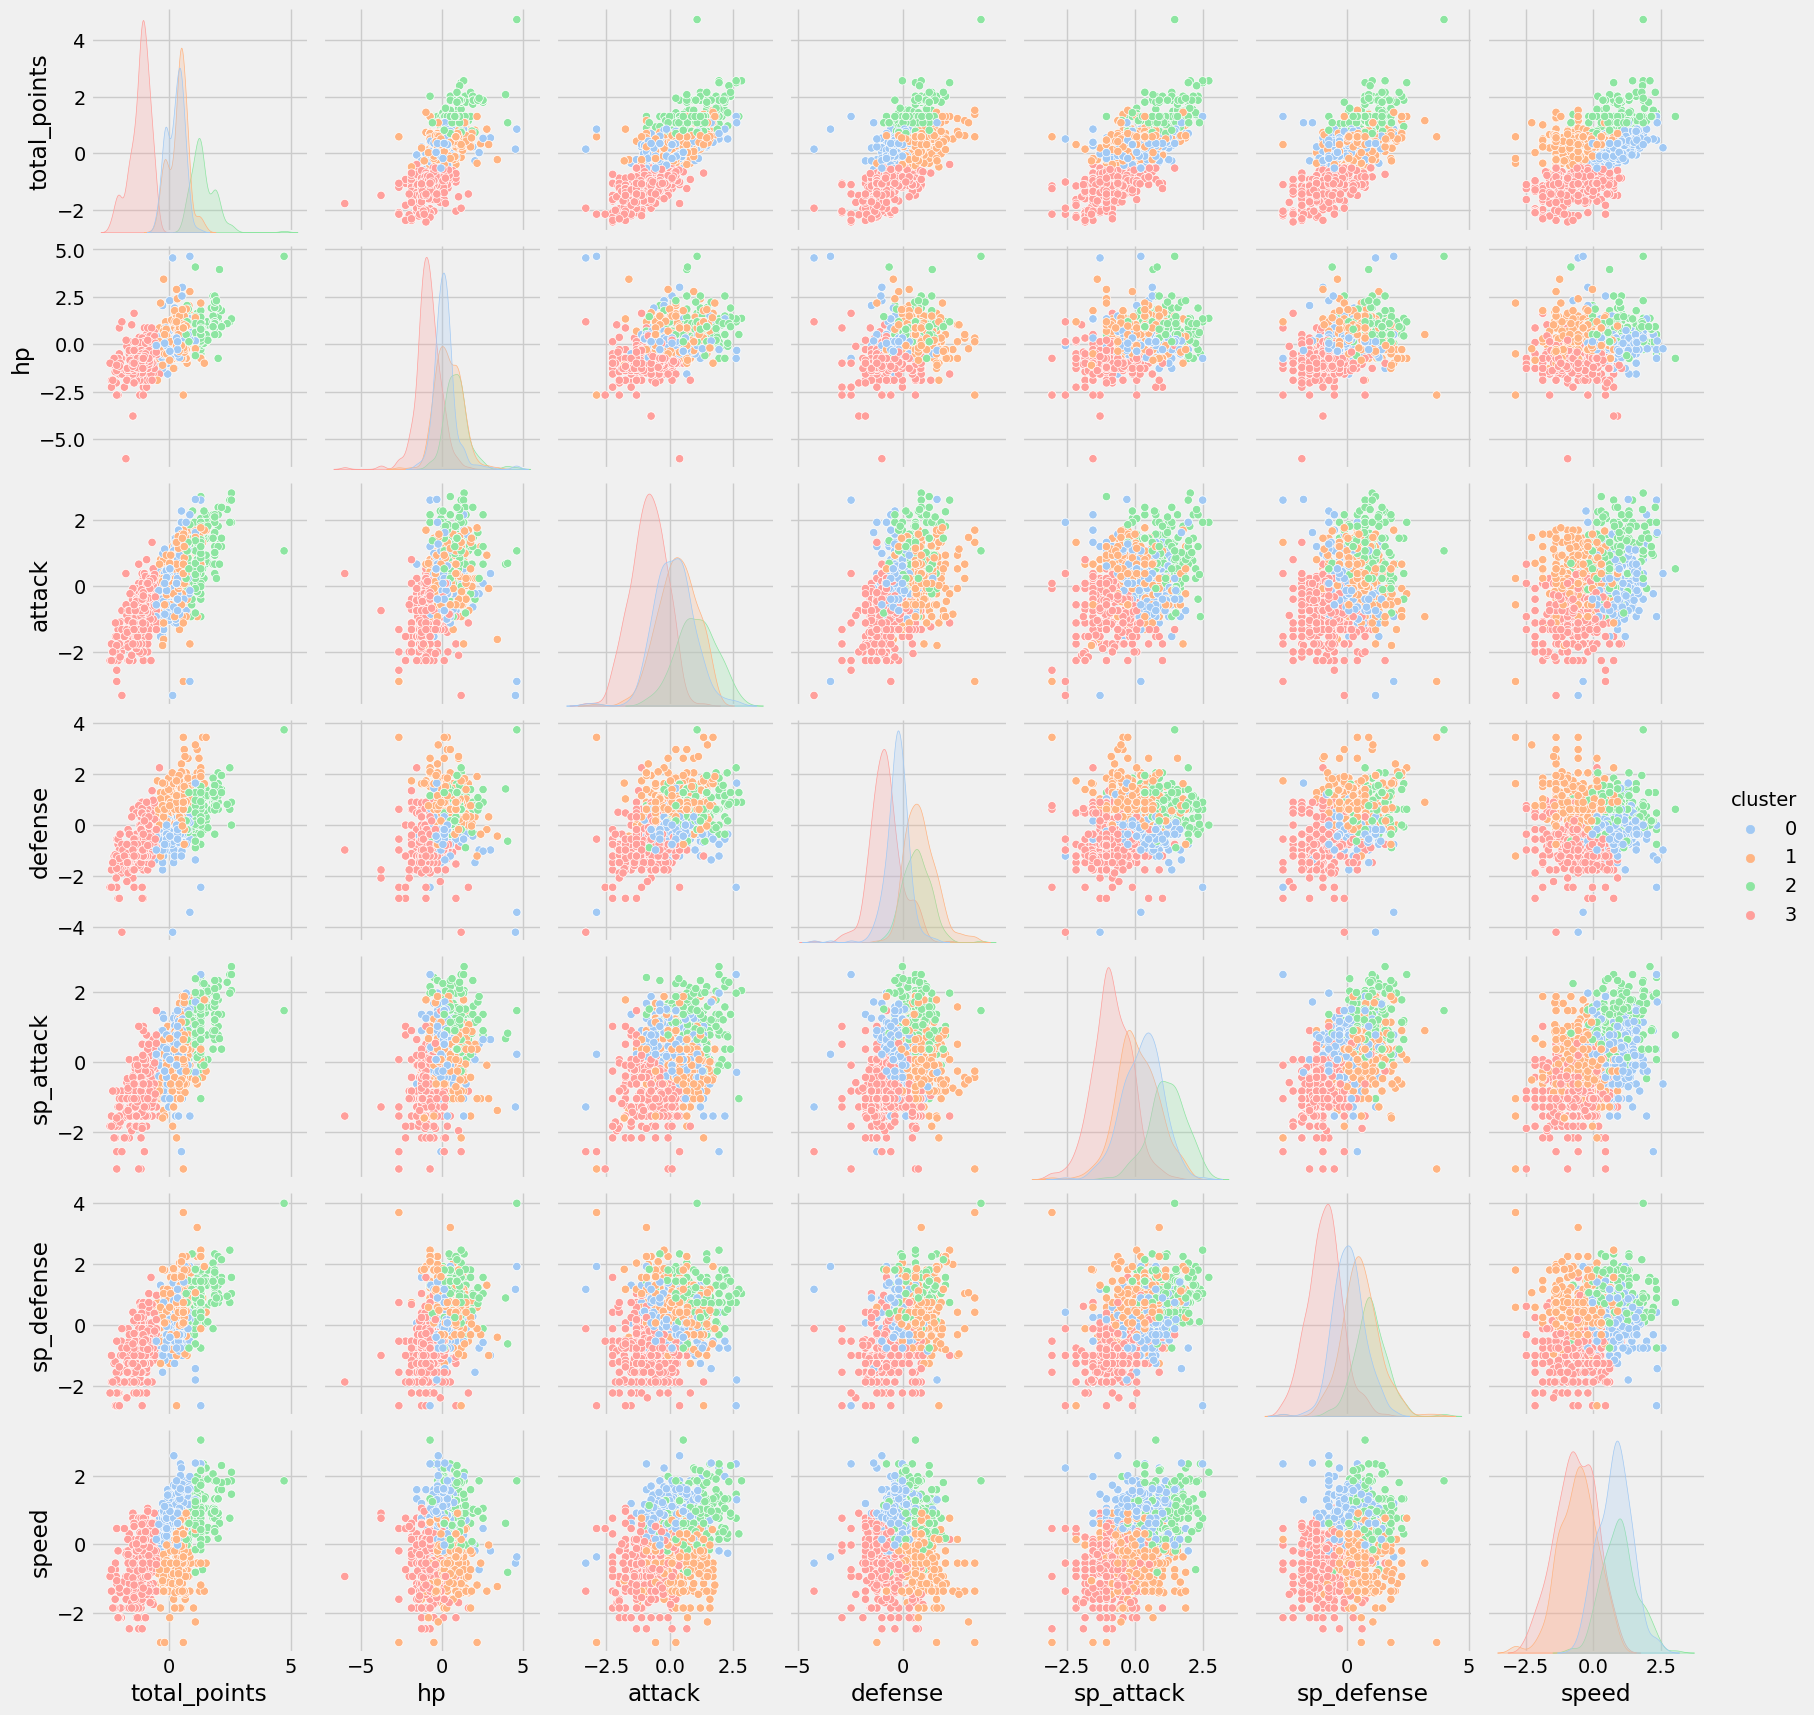

In [96]:
sns.pairplot(stats_set, hue = "cluster", palette = "pastel");

Observing each of the scatterplots above, we can infer that <span><b style="color: limegreen">cluster 2</b></span> is the category where all the strongest Pokemon belong to. It dominates in almost every statistic, while <span><b style="color: skyblue">cluster 0</b></span> and <span><b style="color: orange">cluster 1</b></span> have average performance. Meanwhile, <span><b style="color: tomato">cluster 3</b></span> is the group with the weakest Pokemon.

Now, if we want to know how well each cluster performs on average per category, we can use a bar graph. Use the `.barplot()` method from the seaborn package.

In [97]:
stats_mean_df = stats_set.groupby("cluster").mean()
stats_mean_df["cluster"] = pd.Series([0, 1, 2, 3])

<h4>Overall Average for Total Points</h4>

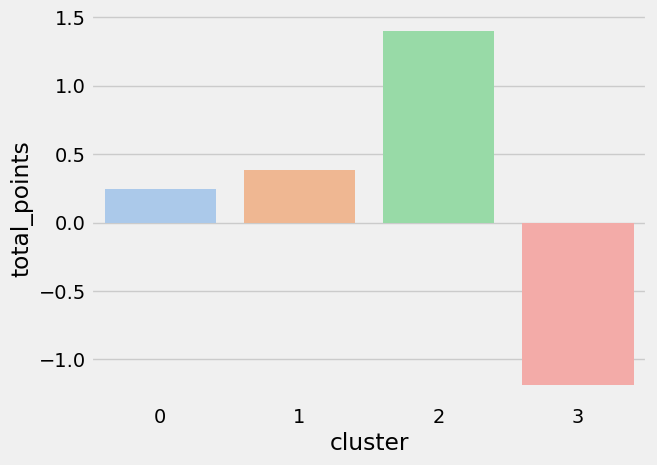

In [98]:
sns.barplot(x = "cluster",y = "total_points",data = stats_mean_df, palette = "pastel")
plt.show()

Based on the total points, <span><b style="color: limegreen">cluster 2</b></span> has the highest mean of around 1.4 while <span><b style="color: tomato">cluster 3</b></span> has the overall worst mean for the total points.

<h4>Top 10 Pokemon per cluster</h4>

After looking at the mean, we want to know who are the top 10 Pokemon per cluster. To filter observations based on cluster, use a condition that is equal to the cluster number we are targeting. The, sort the values in descending order using `sort_values()` and set ascending to `false`. Reset the indexes using the `.reset_index()` function and lastly, set the `.head()` to <b>10</b> to view the top 10 Pokemon in that cluster.

<h5><span><b style="color: skyblue">Cluster 0</b></span></h5>

The list below reveals the top Pokemon of this cluster, with <b>Deoxys Attack Forme</b> taking the #1 spot with 600.0 points while <b>Delphox</b> takes the last spot with 534.0.

In [99]:
cluster_0_members = clustered_poke_df[clustered_poke_df["cluster"] == 0].sort_values("total_points", axis = 0, ascending = False).reset_index()
cluster_0_members[["name", "total_points"]].head(10)

name  total_points
0           Deoxys Attack Forme      1.300950
1                     Pheromosa      1.079613
2                       Kartana      1.079613
3                     Naganadel      0.854194
4                       Blissey      0.854194
5  Darmanitan Galarian Zen Mode      0.854194
6                       Noivern      0.816206
7                        Crobat      0.816206
8                     Infernape      0.808594
9                       Delphox      0.808594

<h5><span><b style="color: orange">Cluster 1</b></span></h5>

The list below reveals the top Pokemon of this cluster, with <b>Mega Aggron</b> taking the #1 spot with 630.0 points while <b>Regice</b> takes the last spot with 580.0.

In [100]:
cluster_1_members = clustered_poke_df[clustered_poke_df["cluster"] == 1].sort_values("total_points", axis = 0, ascending = False).reset_index()
cluster_1_members[["name", "total_points"]].head(10)

name  total_points
0             Mega Aggron      1.518478
1  Wishiwashi School Form      1.446377
2            Mega Steelix      1.373870
3    Deoxys Defense Forme      1.300950
4                 Diancie      1.300950
5                Melmetal      1.300950
6          Mega Abomasnow      1.256996
7            Mega Slowbro      1.227607
8                Regirock      1.153832
9                  Regice      1.153832

<h5><span><b style="color: limegreen">Cluster 2</b></span></h5>

As the most powerful members of the cluster, <b>Eternatus Eternamax</b> taking the #1 spot with a whopping 1125.0 points while <b>Zacian Crowned Sword</b> takes the last spot with 720.0.

In [101]:
cluster_2_members = clustered_poke_df[clustered_poke_df["cluster"] == 2].sort_values("total_points", axis = 0, ascending = False).reset_index()
cluster_2_members[["name", "total_points"]].head(10)

name  total_points
0       Eternatus Eternamax      4.711333
1             Mega Rayquaza      2.556643
2             Mega Mewtwo Y      2.556643
3             Mega Mewtwo X      2.556643
4             Primal Kyogre      2.489728
5            Primal Groudon      2.489728
6            Ultra Necrozma      2.382032
7                    Arceus      2.150508
8  Zamazenta Crowned Shield      2.150508
9      Zacian Crowned Sword      2.150508

<h5><span><b style="color: tomato">Cluster 3</b></span></h5>

Lastly, as the cluster where the weakest Pokemon come to, <b>Onix</b> takes the #1 spot with 385.0 points while <b>Nidorina</b> takes the last spot with 365.0.

In [102]:
cluster_3_members = clustered_poke_df[clustered_poke_df["cluster"] == 3].sort_values("total_points", axis = 0, ascending = False).reset_index()
cluster_3_members[["name", "total_points"]].head(10)

name  total_points
0         Onix     -0.389214
1      Floette     -0.509404
2      Herdier     -0.518049
3      Lampent     -0.518049
4      Duosion     -0.518049
5      Vullaby     -0.518049
6      Hattrem     -0.518049
7  Corvisquire     -0.561395
8      Flaaffy     -0.561395
9     Nidorina     -0.561395

<h4>Starters</h4>

Starter Pokemon are a trainer's best friend. They are the first-ever Pokemon you will get once you enter your journey to becoming a Pokemon Trainer. Though, we sometimes wonder, <i>"Who is the best starter of them all?"</i>. Even though starter selection depends on the person's interests or biases, this notebook showcases factual data to convince you who is objectively the best starter.

Upon inspection, we notice that all the base evolutions of the starters belong in <span><b style="color: tomato">Cluster 3</b></span>. Each of their statistics are very low that they are challenging to use in competitive battles. 

We are to rank the base starters in terms of total points, the best starters tie for the #1 spot with total points of 320.0: <b>Popplio, Litten</b>, and <b>Rowlet</b> - the generation 7 starters.
<figure>
    <img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2F66.media.tumblr.com%2F5644587e63c22b05ab209a933d48ef20%2Ftumblr_ocutvsLXeu1v68t0mo1_500.gif&f=1&nofb=1&ipt=7eb95e2abad2699ed717174b5af40729d033a37f8dc32d6edf962ec760438f91&ipo=images" style="width: 50%">
    <figcaption style="text-align: center">Generation 7 Starters from left to right: Rowlet, Litten, Popplio</figcaption>
</figure>

In [103]:
clustered_poke_df[["name", "total_points", "cluster"]].iloc[[0, 4, 9, 192, 195, 198, 299, 303, 
307, 464, 467, 470, 586, 589, 592, 756, 759, 762, 841, 844, 847, 940, 943, 946]].sort_values("total_points", axis = 0, ascending = False)

name  total_points  cluster
847     Popplio     -0.961294        3
844      Litten     -0.961294        3
841      Rowlet     -0.961294        3
0     Bulbasaur     -0.979505        3
192   Chikorita     -0.979505        3
464     Turtwig     -0.979505        3
9      Squirtle     -1.016047        3
198    Totodile     -1.016047        3
470      Piplup     -1.016047        3
762     Froakie     -1.016047        3
756     Chespin     -1.025208        3
943   Scorbunny     -1.052751        3
940     Grookey     -1.052751        3
946      Sobble     -1.052751        3
307      Mudkip     -1.052751        3
303     Torchic     -1.052751        3
299     Treecko     -1.052751        3
4    Charmander     -1.061952        3
467    Chimchar     -1.061952        3
195   Cyndaquil     -1.061952        3
592    Oshawott     -1.071164        3
589       Tepig     -1.071164        3
586       Snivy     -1.071164        3
759    Fennekin     -1.080387        3

However, if we are to look at the fully evolved starters, they no longer belong to the weakest cluster of the four. Rather, each starter has been categorized in varied clusters. <b>Swampert</b> ranks 1 out of 24 for the starter with 535.0 total points.
<figure>
    <img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fcdn.playbuzz.com%2Fcdn%2Fb9ec3838-45db-4439-97bc-3f1c535c0e3c%2F6cd30f1a-0011-40a9-8936-383cdccffa2e.gif&f=1&nofb=1&ipt=4b39cde4d105d3af61f3b95c1746ddf3461a1746cfe6c3c6add35b168c43199b&ipo=images" style="width: 25%">
    <figcaption style="text-align: center">Swampert from Generation 3</figcaption>
</figure>

In [104]:
evolved_starters = clustered_poke_df[["name", "total_points", "cluster"]].iloc[[2, 6, 11, 194, 197, 200, 301, 305, 
309, 466, 469, 472, 588, 591, 594, 758, 761, 764, 843, 846, 849, 942, 945, 948]].sort_values("total_points", axis = 0, ascending = False)
evolved_starters

name  total_points  cluster
309    Swampert      0.816206        1
469   Infernape      0.808594        0
761     Delphox      0.808594        0
197  Typhlosion      0.808594        2
6     Charizard      0.808594        2
948    Inteleon      0.778095        0
758  Chesnaught      0.778095        1
846  Incineroar      0.778095        1
849   Primarina      0.778095        2
472    Empoleon      0.778095        1
942   Rillaboom      0.778095        2
843   Decidueye      0.778095        2
305    Blaziken      0.778095        2
301    Sceptile      0.778095        0
200  Feraligatr      0.778095        1
945   Cinderace      0.778095        0
11    Blastoise      0.778095        1
764    Greninja      0.778095        0
588   Serperior      0.762816        0
594    Samurott      0.762816        2
591      Emboar      0.762816        2
466    Torterra      0.739859        1
194    Meganium      0.739859        1
2      Venusaur      0.739859        2

If we want to know who are the most powerful starters of them all, we have to look at those who belong to <span><b style="color: limegreen">Cluster 2</b></span>. The Top 3 starters from this cluster are: <b>(1) Typhlosion, (2) Charizard</b> and <b>(3) Primarina</b>.
<figure>
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fprofessorlotus.com%2FSprites%2FTyphlosion.gif&f=1&nofb=1&ipt=dfc82b78a29f70e3fc00df1d99cf8a847bf09108ba519cb83aa78506479868f1&ipo=images" style="width: 15%">
    <figcaption style="text-align: center">Typhlosion from Generation 2</figcaption>
</figure>
<figure>
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.pinimg.com%2Foriginals%2F13%2F57%2F33%2F135733b07291badc8cb3c083d4fd90b0.gif&f=1&nofb=1&ipt=7019c080da34f170d3fa876b77013bee201c176e5d4a91ced9fe2506a25966e6&ipo=images" style="width: 30%">
    <figcaption style="text-align: center">Charizard from Generation 1</figcaption>
</figure>
<figure>
    <img src="https://datadex.talzz.com/images/sprites/33_updated/730-primarina.gif" style="width: 20%">
    <figcaption style="text-align: center">Primarina from Generation 7</figcaption>
</figure>

In [105]:
evolved_starters[evolved_starters["cluster"] == 2]

name  total_points  cluster
197  Typhlosion      0.808594        2
6     Charizard      0.808594        2
849   Primarina      0.778095        2
942   Rillaboom      0.778095        2
843   Decidueye      0.778095        2
305    Blaziken      0.778095        2
594    Samurott      0.762816        2
591      Emboar      0.762816        2
2      Venusaur      0.739859        2

From <span><b style="color: skyblue">Cluster 0</b></span>, the Top 3 starters from this cluster are: <b>(1) Infernape, (2) Delphox</b> and <b>(3) Inteleon</b>.
<figure>
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fprofessorlotus.com%2FSprites%2FInfernape.gif&f=1&nofb=1&ipt=70e61312f6079525e1b2b50a56f7c6a28a371a762acb683ed6ff7cf8ba43e3e3&ipo=images" style="width: 25%">
    <figcaption style="text-align: center">Infernape from Generation 4</figcaption>
</figure>
<figure>
    <img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fimg4.wikia.nocookie.net%2F__cb20140319093018%2Fpokemon%2Fimages%2F3%2F31%2FDelphox_XY.gif&f=1&nofb=1&ipt=4efe53c5708d929d94bfbe4f53a3c482117516fc6bdc498df53e8a74afa9b85c&ipo=images" style="width: 20%">
    <figcaption style="text-align: center">Delphox from Generation 6</figcaption>
</figure>
<figure>
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimages.wikidexcdn.net%2Fmwuploads%2Fwikidex%2F8%2F81%2Flatest%2F20191201052530%2FInteleon_EpEc.gif&f=1&nofb=1&ipt=729fc1311983122eb0bb354c839b92b3aaaf51d159936eb2718d5bccd6eb6cc5&ipo=images" style="width: 13%">
    <figcaption style="text-align: center">Inteleon from Generation 8</figcaption>
</figure>

In [106]:
evolved_starters[evolved_starters["cluster"] == 0]

name  total_points  cluster
469  Infernape      0.808594        0
761    Delphox      0.808594        0
948   Inteleon      0.778095        0
301   Sceptile      0.778095        0
945  Cinderace      0.778095        0
764   Greninja      0.778095        0
588  Serperior      0.762816        0

Finally, from <span><b style="color: orange">Cluster 1</b></span>, the Top 3 starters from this cluster are: <b>(1) Swampert, (2) Chesnaught</b> and <b>(3) Incineroar</b>.
<figure>
    <img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fcdn.playbuzz.com%2Fcdn%2Fb9ec3838-45db-4439-97bc-3f1c535c0e3c%2F6cd30f1a-0011-40a9-8936-383cdccffa2e.gif&f=1&nofb=1&ipt=4b39cde4d105d3af61f3b95c1746ddf3461a1746cfe6c3c6add35b168c43199b&ipo=images" style="width: 25%">
    <figcaption style="text-align: center">Swampert from Generation 3</figcaption>
</figure>
<figure>
    <img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fimg1.wikia.nocookie.net%2F__cb20140319091349%2Fpokemon%2Fimages%2Fa%2Fad%2FChesnaught_XY.gif&f=1&nofb=1&ipt=6490d8344367ef915dead8b70f4fa667cb801fcb0b7a588c28eaf9ea05bf5b40&ipo=images" style="width: 30%">
    <figcaption style="text-align: center">Chesnaught from Generation 6</figcaption>
</figure>
<figure>
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fprojectpokemon.org%2Fimages%2Fnormal-sprite%2Fincineroar.gif&f=1&nofb=1&ipt=a3b284ac590647535c2ac053570a5c436d92a8846b189255fbe0bbab28d1a709&ipo=images" style="width: 30%">
    <figcaption style="text-align: center">Incineroar from Generation 7</figcaption>
</figure>

In [107]:
evolved_starters[evolved_starters["cluster"] == 1]

name  total_points  cluster
309    Swampert      0.816206        1
758  Chesnaught      0.778095        1
846  Incineroar      0.778095        1
472    Empoleon      0.778095        1
200  Feraligatr      0.778095        1
11    Blastoise      0.778095        1
466    Torterra      0.739859        1
194    Meganium      0.739859        1

Based on the rankings above, we now finally know who are the top Pokemon per cluster.

Once we are done exploring our data, we can proceed with statistical inference or hypothesis testing,

<h2>🔬 Statistical Inference 🔬</h2>

Now that we have modelled our data using K-Means clustering and explored them, we will now perform hypothesis testing to reveal the answer to our research question. <b>Hypothesis testing</b> is done to prove or disprove our hypothesis based on a certain threshold.

<p style="font-weight: bold">🤔 Research Question 🤔: <span style="color: #8aa1ff;">What is the relation between pokemon generation and type 1 element to health points, defense, special attack, special defense, and speed?</span></p>

To start, install the statsmodels.formula.api then import `ols` from the `statsmodels.formula.api` package.

In [108]:
!pip install statsmodels==0.13.5

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.2/9.2 MB 3.4 MB/s eta 0:00:00


In [109]:
from statsmodels.formula.api import ols

Since our research questions revolves around the idea on whether the clusters are similar or not, the <b>One Way F-test (ANOVA)</b> will be employed to determine how dissimilar the clusters are. This test specializes on finding out if the means of all groups are the same. The following hypotheses will be used:
- <b>H<sub>O</sub>:</b> The clusters are similar
- <b>H<sub>A</sub>:</b> At least one of the clusters are dissimilar

To begin, group the Pokemon by cluster using `.groupby()`. Print a list of Pokemon belong to each cluster using a `for loop`.

In [110]:
new_clustered_poke_df = clustered_poke_df.groupby(["cluster"])
sets = ['name','status','generation','total_points', 'hp', 'attack','defense','sp_attack','sp_defense','speed','cluster']

for i in range(0,4):
    print("cluster ",i)
    print(new_clustered_poke_df[sets].get_group(i).head(10))
    print("\n")

cluster  0
               name  status  generation  total_points        hp    attack  \
1           Ivysaur  Normal           1     -0.220112 -0.279126 -0.493284   
5        Charmeleon  Normal           1     -0.220112 -0.367527 -0.425726   
15       Butterfree  Normal           1     -0.304292 -0.279126 -1.110625   
18         Beedrill  Normal           1     -0.304292 -0.066268  0.382722   
19    Mega Beedrill  Normal           1      0.507725 -0.066268  1.931823   
22          Pidgeot  Normal           1      0.381927  0.621359  0.085401   
26         Raticate  Normal           1     -0.153286 -0.503955  0.115822   
27  Alolan Raticate  Normal           1     -0.153286  0.329220 -0.196085   
29           Fearow  Normal           1      0.085286 -0.066268  0.382722   
31            Arbok  Normal           1      0.133959 -0.279126  0.526069   

     defense  sp_attack  sp_defense     speed  cluster  
1  -0.255477   0.364033    0.410743 -0.197358        0  
5  -0.442848   0.364033   -

Next, perform the test using `.f_oneway()` to compute for the f-Score and the p-value. Set the <b>significance level</b> to <b>α = 0.05</b> as the threshold for determining the significance of the resulting p-value. 

In [111]:
sets = ["total_points","hp","attack","defense","sp_attack","sp_defense","speed"]
clustered_poke_df[sets] = copy_poke_df[sets]

new_clustered_poke_df = clustered_poke_df.groupby("cluster")
sets = ['hp', 'attack','defense','sp_attack','sp_defense','speed']
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []

cluster0 = new_clustered_poke_df[sets].get_group(0)
cluster1 = new_clustered_poke_df[sets].get_group(1)
cluster2 = new_clustered_poke_df[sets].get_group(2)
cluster3 = new_clustered_poke_df[sets].get_group(3)

# Identify whether there is any relationship within their spending scores
F, p = stats.f_oneway(cluster0,cluster1,cluster2,cluster3)
print('F-Score: ' + str(F))
print('P-value: ' + str(p))

for _ in p:
    if _ < 0.05:
        print('Reject Null hypothesis. Clusters are not similar')
    else:
        print('Accept Null hypothesis. Clusters are similar')

F-Score: [191.50148188 265.28037858 305.77092542 326.16211164 295.52398644
 423.59848505]
P-value: [1.43892319e-098 2.31624906e-127 1.03220488e-141 1.32527294e-148
 3.62316869e-138 7.11334581e-179]
Reject Null hypothesis. Clusters are not similar
Reject Null hypothesis. Clusters are not similar
Reject Null hypothesis. Clusters are not similar
Reject Null hypothesis. Clusters are not similar
Reject Null hypothesis. Clusters are not similar
Reject Null hypothesis. Clusters are not similar


After testing, the <b>f-scores</b> are <b>[191.50148188, 265.28037858, 305.77092542, 326.16211164, 295.52398644, 423.59848505]</b>.

Moreover, the resulting <b>p-values</b> for each stat is <b>[1.43892319e-098, 2.31624906e-127, 1.03220488e-141, 1.32527294e-148, 3.62316869e-138, 7.11334581e-179]</b>. 

Since these p-values are less than the <b>significance level of 0.05</b>, we <b>reject the null hypothesis</b>. 

Therefore, we conclude that <b>the clusters are dissimilar (not similar)</b>.

<h3>Classifying Clusters</h3>

In [112]:
to_csv_poke_df = clustered_poke_df.copy()
length = len(to_csv_poke_df)
to_csv_poke_df["cluster_name"] ="none"
data = []

If we look at the clusters of each starter Pokemon, their differences are noticeable once we analyze the features. To put them simply:
- <span><b style="color: skyblue">Cluster 0</b>:</span> Fragile sweeper
- <span><b style="color: orange">Cluster 1</b>:</span> Slow yet bulky
- <span><b style="color: limegreen">Cluster 2</b>:</span> Best overall
- <span><b style="color: tomato">Cluster 3</b>:</span> No potential for competitive

In [113]:
for i in range(0,length):
    if(to_csv_poke_df.iloc[i]["cluster"] == 0):
        data.append("Fragile sweeper")
    elif(to_csv_poke_df.iloc[i]["cluster"] == 1):
        data.append("Slow yet bulky")
    elif(to_csv_poke_df.iloc[i]["cluster"] == 2):
        data.append("Best overall")
    elif(to_csv_poke_df.iloc[i]["cluster"] == 3):
        data.append("No potential for competitive")

to_csv_poke_df["cluster_name"] = data

sets = ["name","generation","status","type_1","total_points","hp","attack","defense","sp_attack","sp_defense","speed","cluster","cluster_name"]
to_csv_poke_df = to_csv_poke_df[sets]
sets = ["total_points","hp","attack","defense","sp_attack","sp_defense","speed"]
to_csv_poke_df[sets] = copy_poke_df[sets]
sets = ["name","generation","status","type_1","total_points","hp","attack","defense","sp_attack","sp_defense","speed","cluster","cluster_name"]
to_csv_poke_df[sets].head(4)

name  generation  status type_1  total_points    hp  attack  \
0      Bulbasaur           1  Normal  Grass         318.0  45.0    49.0   
1        Ivysaur           1  Normal  Grass         405.0  60.0    62.0   
2       Venusaur           1  Normal  Grass         525.0  80.0    82.0   
3  Mega Venusaur           1  Normal  Grass         625.0  80.0   100.0   

   defense  sp_attack  sp_defense  speed  cluster  \
0     49.0       65.0        65.0   45.0        3   
1     63.0       80.0        80.0   60.0        0   
2     83.0      100.0       100.0   80.0        2   
3    123.0      122.0       120.0   80.0        2   

                   cluster_name  
0  No potential for competitive  
1               Fragile sweeper  
2                  Best overall  
3                  Best overall

The median and mean health points, attack, defense, special attack, special defense, and speed of each cluster will be taken.

In [114]:
to_csv_radar = to_csv_poke_df.groupby(["cluster"]).agg({
    "hp":"median",
    "attack":"median",
    "defense":"median",
    "sp_attack":"median",
    "sp_defense":"median",
    "speed":"median"
})
to_csv_radar

to_csv_radar2 = to_csv_poke_df.groupby(["cluster"]).agg({
    "hp":"mean",
    "attack":"mean",
    "defense":"mean",
    "sp_attack":"mean",
    "sp_defense":"mean",
    "speed":"mean"
})
to_csv_radar2

hp      attack     defense   sp_attack  sp_defense      speed
cluster                                                                      
0        72.119691   83.787645   63.984556   79.177606   71.351351  92.525097
1        78.672932   88.390977  101.872180   73.308271   86.372180  51.157895
2        92.748503  115.293413   94.083832  114.646707   99.425150  98.275449
3        48.901786   53.261905   51.127976   46.476190   47.895833  49.014881

To support the argument stated above regarding the clusters, we take into account each statistic and then graph a radar chart.

In [115]:
to_csv_poke_df.to_csv("hierachy_poke.csv")
to_csv_radar.to_csv("radar_poke.csv")
to_csv_radar2.to_csv("radar_poke2.csv")

In [116]:
df_from_cluster0 = poke_df[poke_df['pokedex_number'].isin(cluster0.index.values.tolist())]
df_from_cluster1 = poke_df[poke_df['pokedex_number'].isin(cluster1.index.values.tolist())]
df_from_cluster2 = poke_df[poke_df['pokedex_number'].isin(cluster2.index.values.tolist())]
df_from_cluster3 = poke_df[poke_df['pokedex_number'].isin(cluster3.index.values.tolist())]

<h4><span><b style="color: skyblue">Cluster 0</b>:</span> Fragile sweeper</h4>

In [117]:
import plotly.graph_objects as go
cols = poke_df.columns[16:22].tolist()
fig = go.Figure()

for index, row in df_from_cluster0.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[cols].values.tolist(),
        theta=cols,
        fill='toself',
        name=row[2]
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True
)

fig.show()

If we look at the radar chart of this cluster, their highest stats are <b>speed, attack</b>, and <b>special attack</b>. Yet, their special defense and defense are low. We can use the `.mean()` function to get the average points for this cluster.

In [118]:
cluster_0_df = clustered_poke_df[clustered_poke_df["cluster"] == 0]
cluster_0_df[["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]].mean().sort_values(ascending = False)

speed         92.525097
attack        83.787645
sp_attack     79.177606
hp            72.119691
sp_defense    71.351351
defense       63.984556
dtype: float64

Based on the results, we can assume that <span><b style="color: skyblue">Cluster 0</b></span> houses Pokemon that are mixed attackers with quick reflexes yet as fragile as glass.

<h4><span><b style="color: orange">Cluster 1</b>:</span> Slow yet bulky</h4>

In [119]:
for index, row in df_from_cluster1.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[cols].values.tolist(),
        theta=cols,
        fill='toself',
        name=row[2]
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True
)

fig.show()

If we look at the radar chart of this cluster, their highest stat is <b>defense</b>. In contrast to the fragile sweepers previously, this cluster has low average speed, making them the last to move in a battle.

In [120]:
cluster_1_df = clustered_poke_df[clustered_poke_df["cluster"] == 1]
cluster_1_df[["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]].mean().sort_values(ascending = False)

defense       101.872180
attack         88.390977
sp_defense     86.372180
hp             78.672932
sp_attack      73.308271
speed          51.157895
dtype: float64

Based on the results, we can assume that <span><b style="color: orange">Cluster 1</b></span> houses the slow yet ultra defensive walls made to stall the opponent's Pokemon.

<h4><span><b style="color: limegreen">Cluster 2</b>:</span> Best overall</h4>

In [121]:
for index, row in df_from_cluster2.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[cols].values.tolist(),
        theta=cols,
        fill='toself',
        name=row[2]
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True
)

fig.show()

If we look at the radar chart of this cluster, their highest stat are <b>attack</b> and <b>special attack</b>. Moreover, their special defense is also good, as well as their speed. Their lowest, however, is HP, which would mean that their energy can be drained quicker in battle.

In [122]:
cluster_2_df = clustered_poke_df[clustered_poke_df["cluster"] == 2]
cluster_2_df[["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]].mean().sort_values(ascending = False)

attack        115.293413
sp_attack     114.646707
sp_defense     99.425150
speed          98.275449
defense        94.083832
hp             92.748503
dtype: float64

Based on the results, we can assume that <span><b style="color: limegreen">Cluster 2</b></span> houses the Pokemon that have the potential for competitive battles.

<h4><span><b style="color: tomato">Cluster 3</b>:</span> No potential for competitive</h4>

In [123]:
for index, row in df_from_cluster3.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[cols].values.tolist(),
        theta=cols,
        fill='toself',
        name=row[2]
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=True
)

fig.show()

If we look at the radar chart of this cluster, their highest stat are <b>attack</b>. However, this is still the lowest when compared with the previous clusters. Since all of their stats are the lowest among the clusters, they have no use for competitive battling unless you are capable of their high maintenance nature.

In [124]:
cluster_3_df = clustered_poke_df[clustered_poke_df["cluster"] == 3]
cluster_3_df[["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]].mean().sort_values(ascending = False)

attack        53.261905
defense       51.127976
speed         49.014881
hp            48.901786
sp_defense    47.895833
sp_attack     46.476190
dtype: float64

Based on the results, we can assume that <span><b style="color: tomato">Cluster 3</b></span> houses the Pokemon that should be used at your own risk unless you only want to keep them as pets at home.

<h3>Median and Mean</3>

To gather better information from the individual data of each Pokemon, the median and mean radar charts are shown to know which cluster is the best and the worst in each stat. To graph a radar chart, import the `display` and `HTML` from the `IPython.core.display` package.

In [125]:
from IPython.core.display import display, HTML

<h4>Median</h4>

The radar chart of the median of each clusters are shown below

In [126]:
display(HTML('<div class="flourish-embed flourish-radar" data-src="visualisation/12108136"><script src="https://public.flourish.studio/resources/embed.js"></script></div>'))


Like before, <span><b style="color: limegreen">Cluster 2</b></span> dominates all stats while <span><b style="color: tomato">Cluster 3</b></span> is the weakest cluster.

<h4>Mean</h4>

The radar chart of the means of each clusters are also shown below

In [127]:
display(HTML('<div class="flourish-embed flourish-radar" data-src="visualisation/12108618"><script src="https://public.flourish.studio/resources/embed.js"></script></div>'))


Like before, <span><b style="color: limegreen">Cluster 2</b></span> dominates all stats while <span><b style="color: tomato">Cluster 3</b></span> is the weakest cluster.

<h3>Clusters of Generations and Elements</3>

The cluster below groups Pokemon in terms of generation first followed by their primary typing. The display is interactive. Click on a cluster to view its subclusters of generations and typing.

In [128]:
display(HTML('<div class="flourish-embed flourish-hierarchy" data-src="visualisation/12105634"><script src="https://public.flourish.studio/resources/embed.js"></script></div>'))

In <span><b style="color: purple">Cluster 0 (ranged attacker with good mobility)</b></span>, although <b>Normal</b> and <b>Water</b> seem to stand out more, there are not a lot of type 1 elements that stand out so much. As per generation, <b>generation 1</b> dominates this cluster with 59 total Pokémon and second place goes to generation 5 with 44 total Pokémon

In <span><b style="color: orange">Cluster 1(Physical type that can tank and damage)</b></span>, since they are known as the physical type that can tank and take hits very well, <b>rock</b> and <b>steel</b> seem to dominate this cluster more by having larger counts than the other elements. As per generation, there does not seem to be much of a significant difference in frequency where <b>generation 1</b> having 40 total Pokémon generation 3 having 39 total Pokémon and generation 5 having a total of 38 Pokémon.

In <span><b style="color: hotpink">Cluster 2 (permanent ban because of OP statistics)</b></span>, you can notice that <b>dragon</b> and <b>psychic</b> have larger clusters than the other elements. This is expected because these are known to be a very strong pair. <b>Generation 3</b> consists a total of 30 Pokémon, making it the most frequent one in this cluster. However, it does not matter that much because Generation 5 and 4 come out to having 27 and 26 Pokémon respectively. You could say these generations are the most apparent in this cluster.

Lastly, in <span><b style="color: blue">Cluster 3 (group of weak pokemon)</b></span>, <b>water</b> seems to stand out the most as it has larger clusters compared to the other type 1 elements. On the other hand, <b>generation 1</b> and 5 seem to dominate this cluster having 68 and 62 total Pokémon respectively.

<p style="color: skyblue; font-weight: bold">📖 Now that the whole process of data preprocessing, data modelling, exploratory data analysis, and statistical inference, we can finally come up with our conclusion based on the results. 📚</p>

<h2>💡 Insights and Conclusion 💡</h2>

<h3>Which generation is best to use?</h3>

Generation-wise, there were not a lot of differences to say which generation is the "strongest" or the "best" to use. Most of the generations seem pretty equal despite generation 3 dominating the overpowered cluster 2. 

There are many choices of Pokémon you can choose among each generation so it is best to not be so worried on which generation to use to have stronger Pokémon. It all depends in the region/game the trainer/user is in. Some games limit you to only use Pokemon exclusive to the region, while some games allow foreign Pokemon in their region upon transfer.

In short, <b>there is no "best" generation</b>. 

<h3>Which type 1 element is best to use?</h3>

As seen in cluster 2, <b>psychic</b> and <b>dragon</b> type 1 element is best to use. Since cluster 2 dominates all the clusters in all statistics but defense, it is best to find Pokémon of these elements to dominate in battle. 

However, if you would like Pokémon that is good on defense, it best to use <b>rock</b> and <b>steel</b> Pokémon as seen on cluster 1 because, statistically, their defense is better than even those on the overpowered cluster. 

<h2>💌 The End ✉️</h2>

You have reached the end of the notebook. This project is done by <b>DAYON, Elijah, ERMITANO, Kate Justine,</b> and <b>LLAMADO, Jon</b> as a requirement to pass CSMODEL under the instructions of <b>Sir Arren Matthew C. Antioquia</b>, submitted on December 9, 2022.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c26f6b62-b819-4c99-9d10-2b13381c9f87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>